In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'enhanced_healthmonitoring.csv'
df = pd.read_csv(file_path)

In [7]:
# Display basic information
print("Basic Info:")
df.info()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          500 non-null    int64  
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   HeartRate          500 non-null    float64
 4   BloodPressure      500 non-null    object 
 5   RespiratoryRate    500 non-null    int64  
 6   BodyTemperature    482 non-null    float64
 7   ActivityLevel      500 non-null    object 
 8   OxygenSaturation   337 non-null    float64
 9   SleepQuality       500 non-null    object 
 10  StressLevel        500 non-null    object 
 11  Height             500 non-null    int64  
 12  Weight             500 non-null    int64  
 13  BMI                500 non-null    float64
 14  ExerciseFrequency  500 non-null    int64  
 15  Diabetes           500 non-null    object 
 16  DietType      

In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       482.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.583458   
std    144.481833   19.821566    9.606273         3.382352         0.470033   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.274100   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.938284   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation      Height      Weight         BMI  ExerciseFrequency  
count        337.000000  500.000000  500.000000  500.000000         500.000000  
mean          96.439169  170.784000   94.288000   33.305322           3.518000  
std            1.698216 

In [9]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing values (Fill numeric columns with median, categorical with mode)
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Display missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Print the cleaned dataset
print("\nCleaned Dataset (First 10 Rows):")
print(df.head(10))

# Save the cleaned dataset
df.to_csv("cleaned_healthmonitoring.csv", index=False)


Missing Values:
PatientID              0
Age                    0
Gender                 0
HeartRate              0
BloodPressure          0
RespiratoryRate        0
BodyTemperature       18
ActivityLevel          0
OxygenSaturation     163
SleepQuality           0
StressLevel            0
Height                 0
Weight                 0
BMI                    0
ExerciseFrequency      0
Diabetes               0
DietType               0
Timestamp              0
dtype: int64

Missing Values After Handling:
PatientID            0
Age                  0
Gender               0
HeartRate            0
BloodPressure        0
RespiratoryRate      0
BodyTemperature      0
ActivityLevel        0
OxygenSaturation     0
SleepQuality         0
StressLevel          0
Height               0
Weight               0
BMI                  0
ExerciseFrequency    0
Diabetes             0
DietType             0
Timestamp            0
dtype: int64

Cleaned Dataset (First 10 Rows):
   PatientID  Age  Gender  

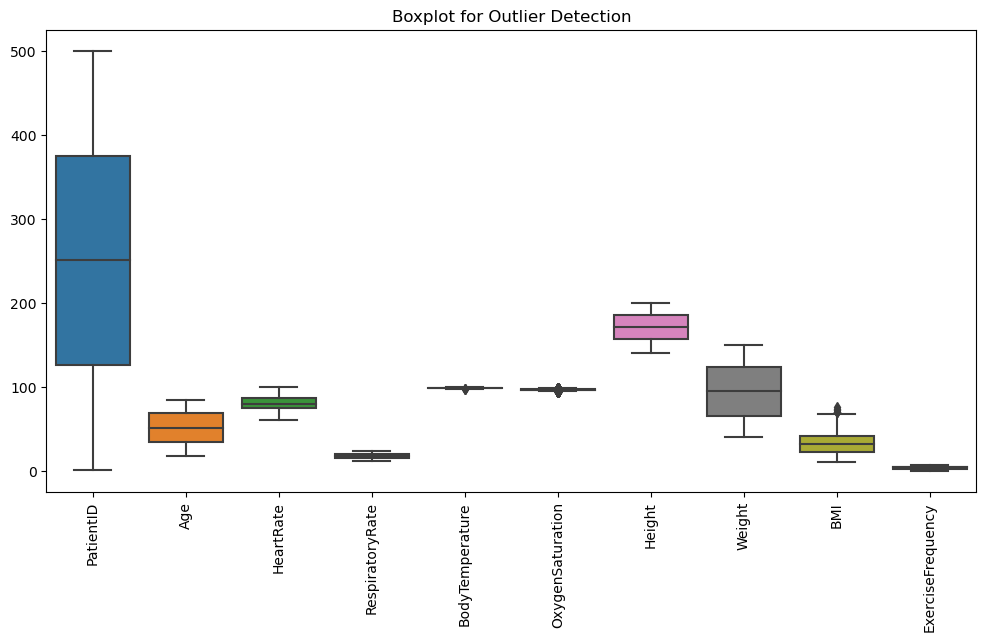

In [10]:
# Detecting outliers using boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

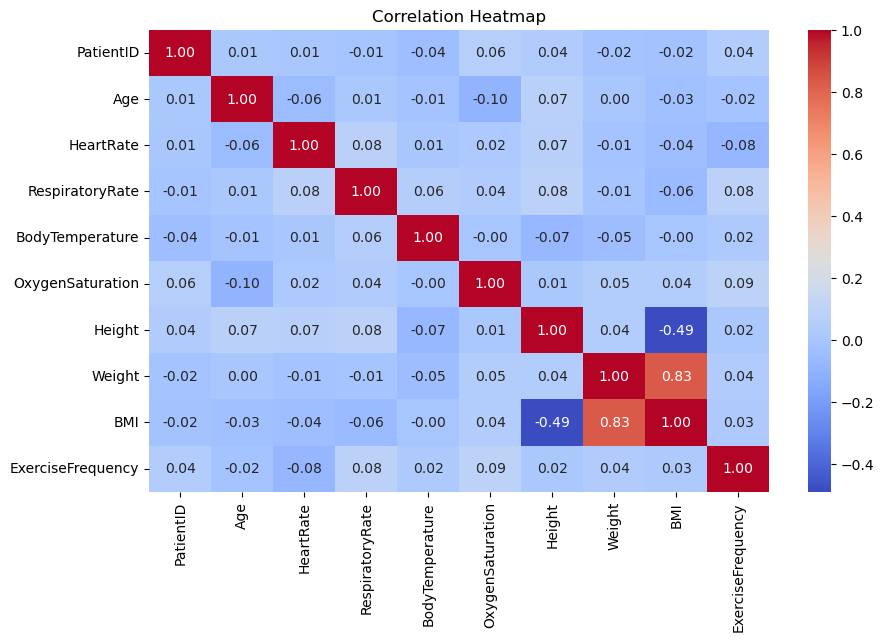

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

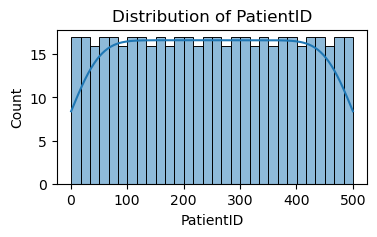

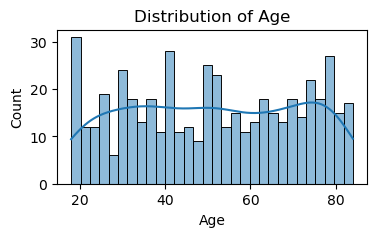

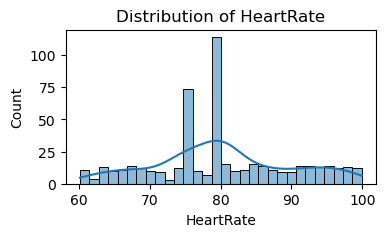

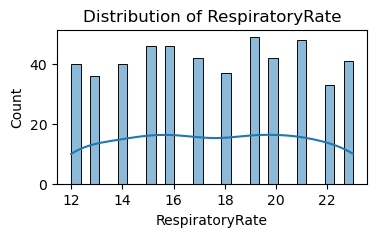

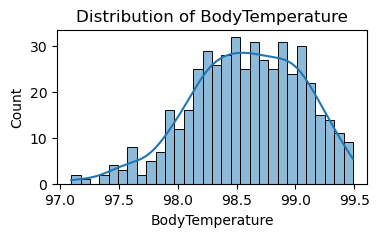

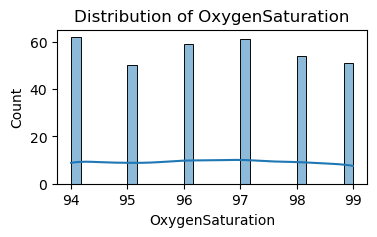

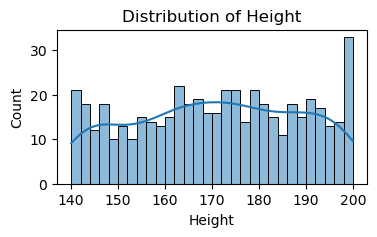

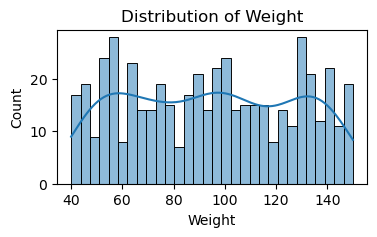

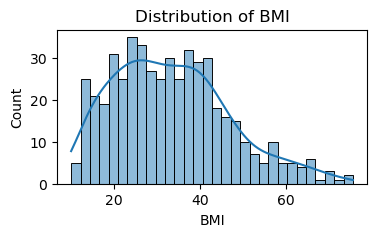

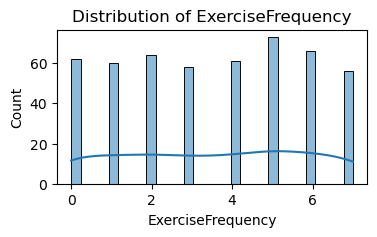

In [23]:
# Distribution plots for numerical features
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

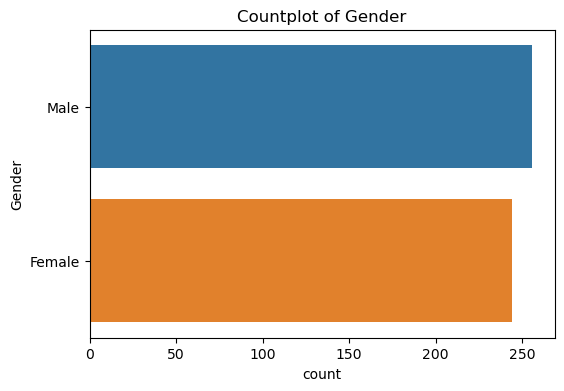

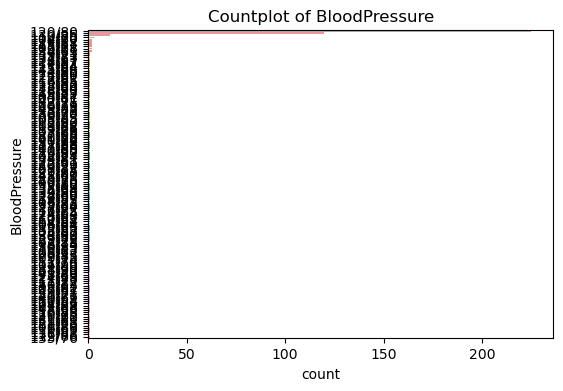

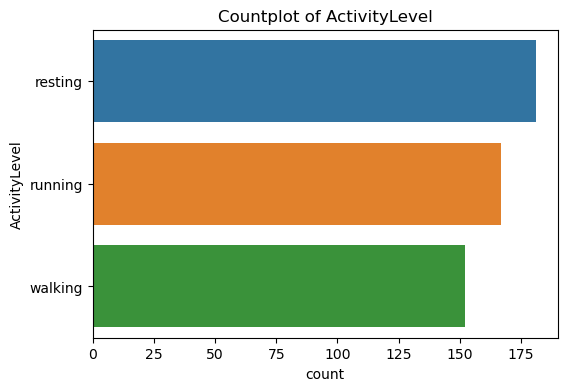

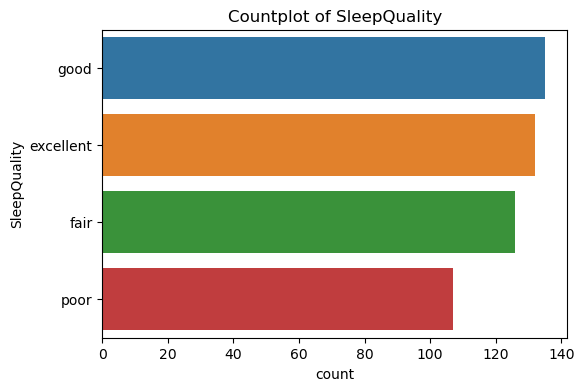

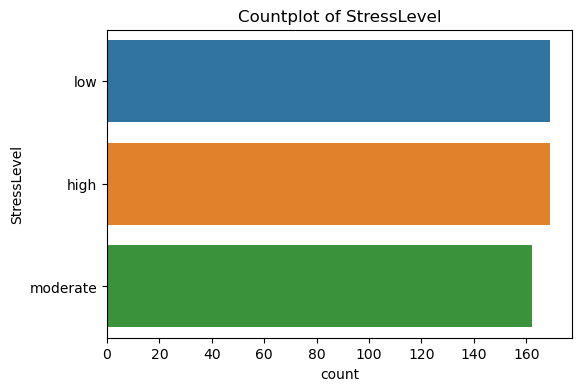

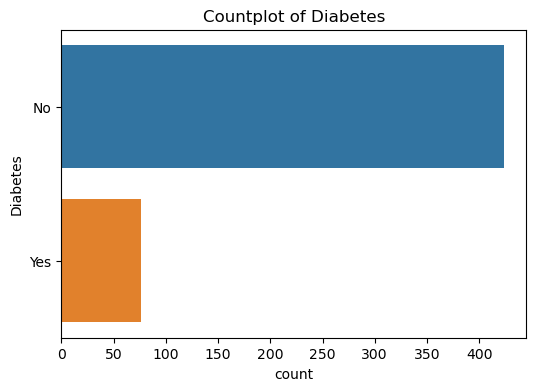

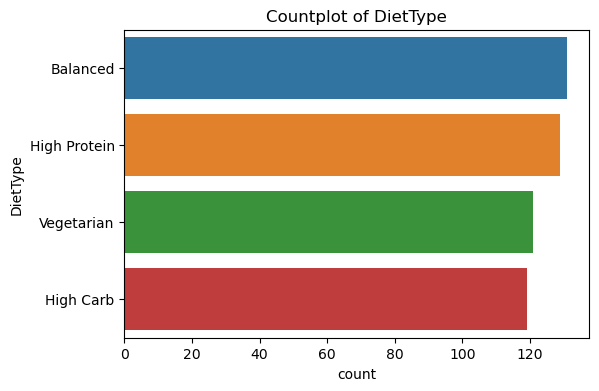

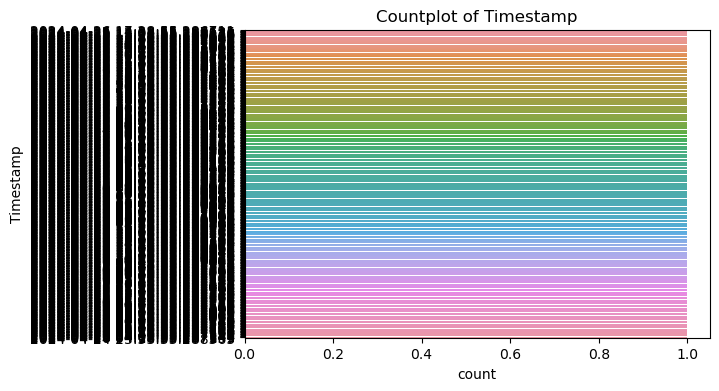

In [13]:
# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

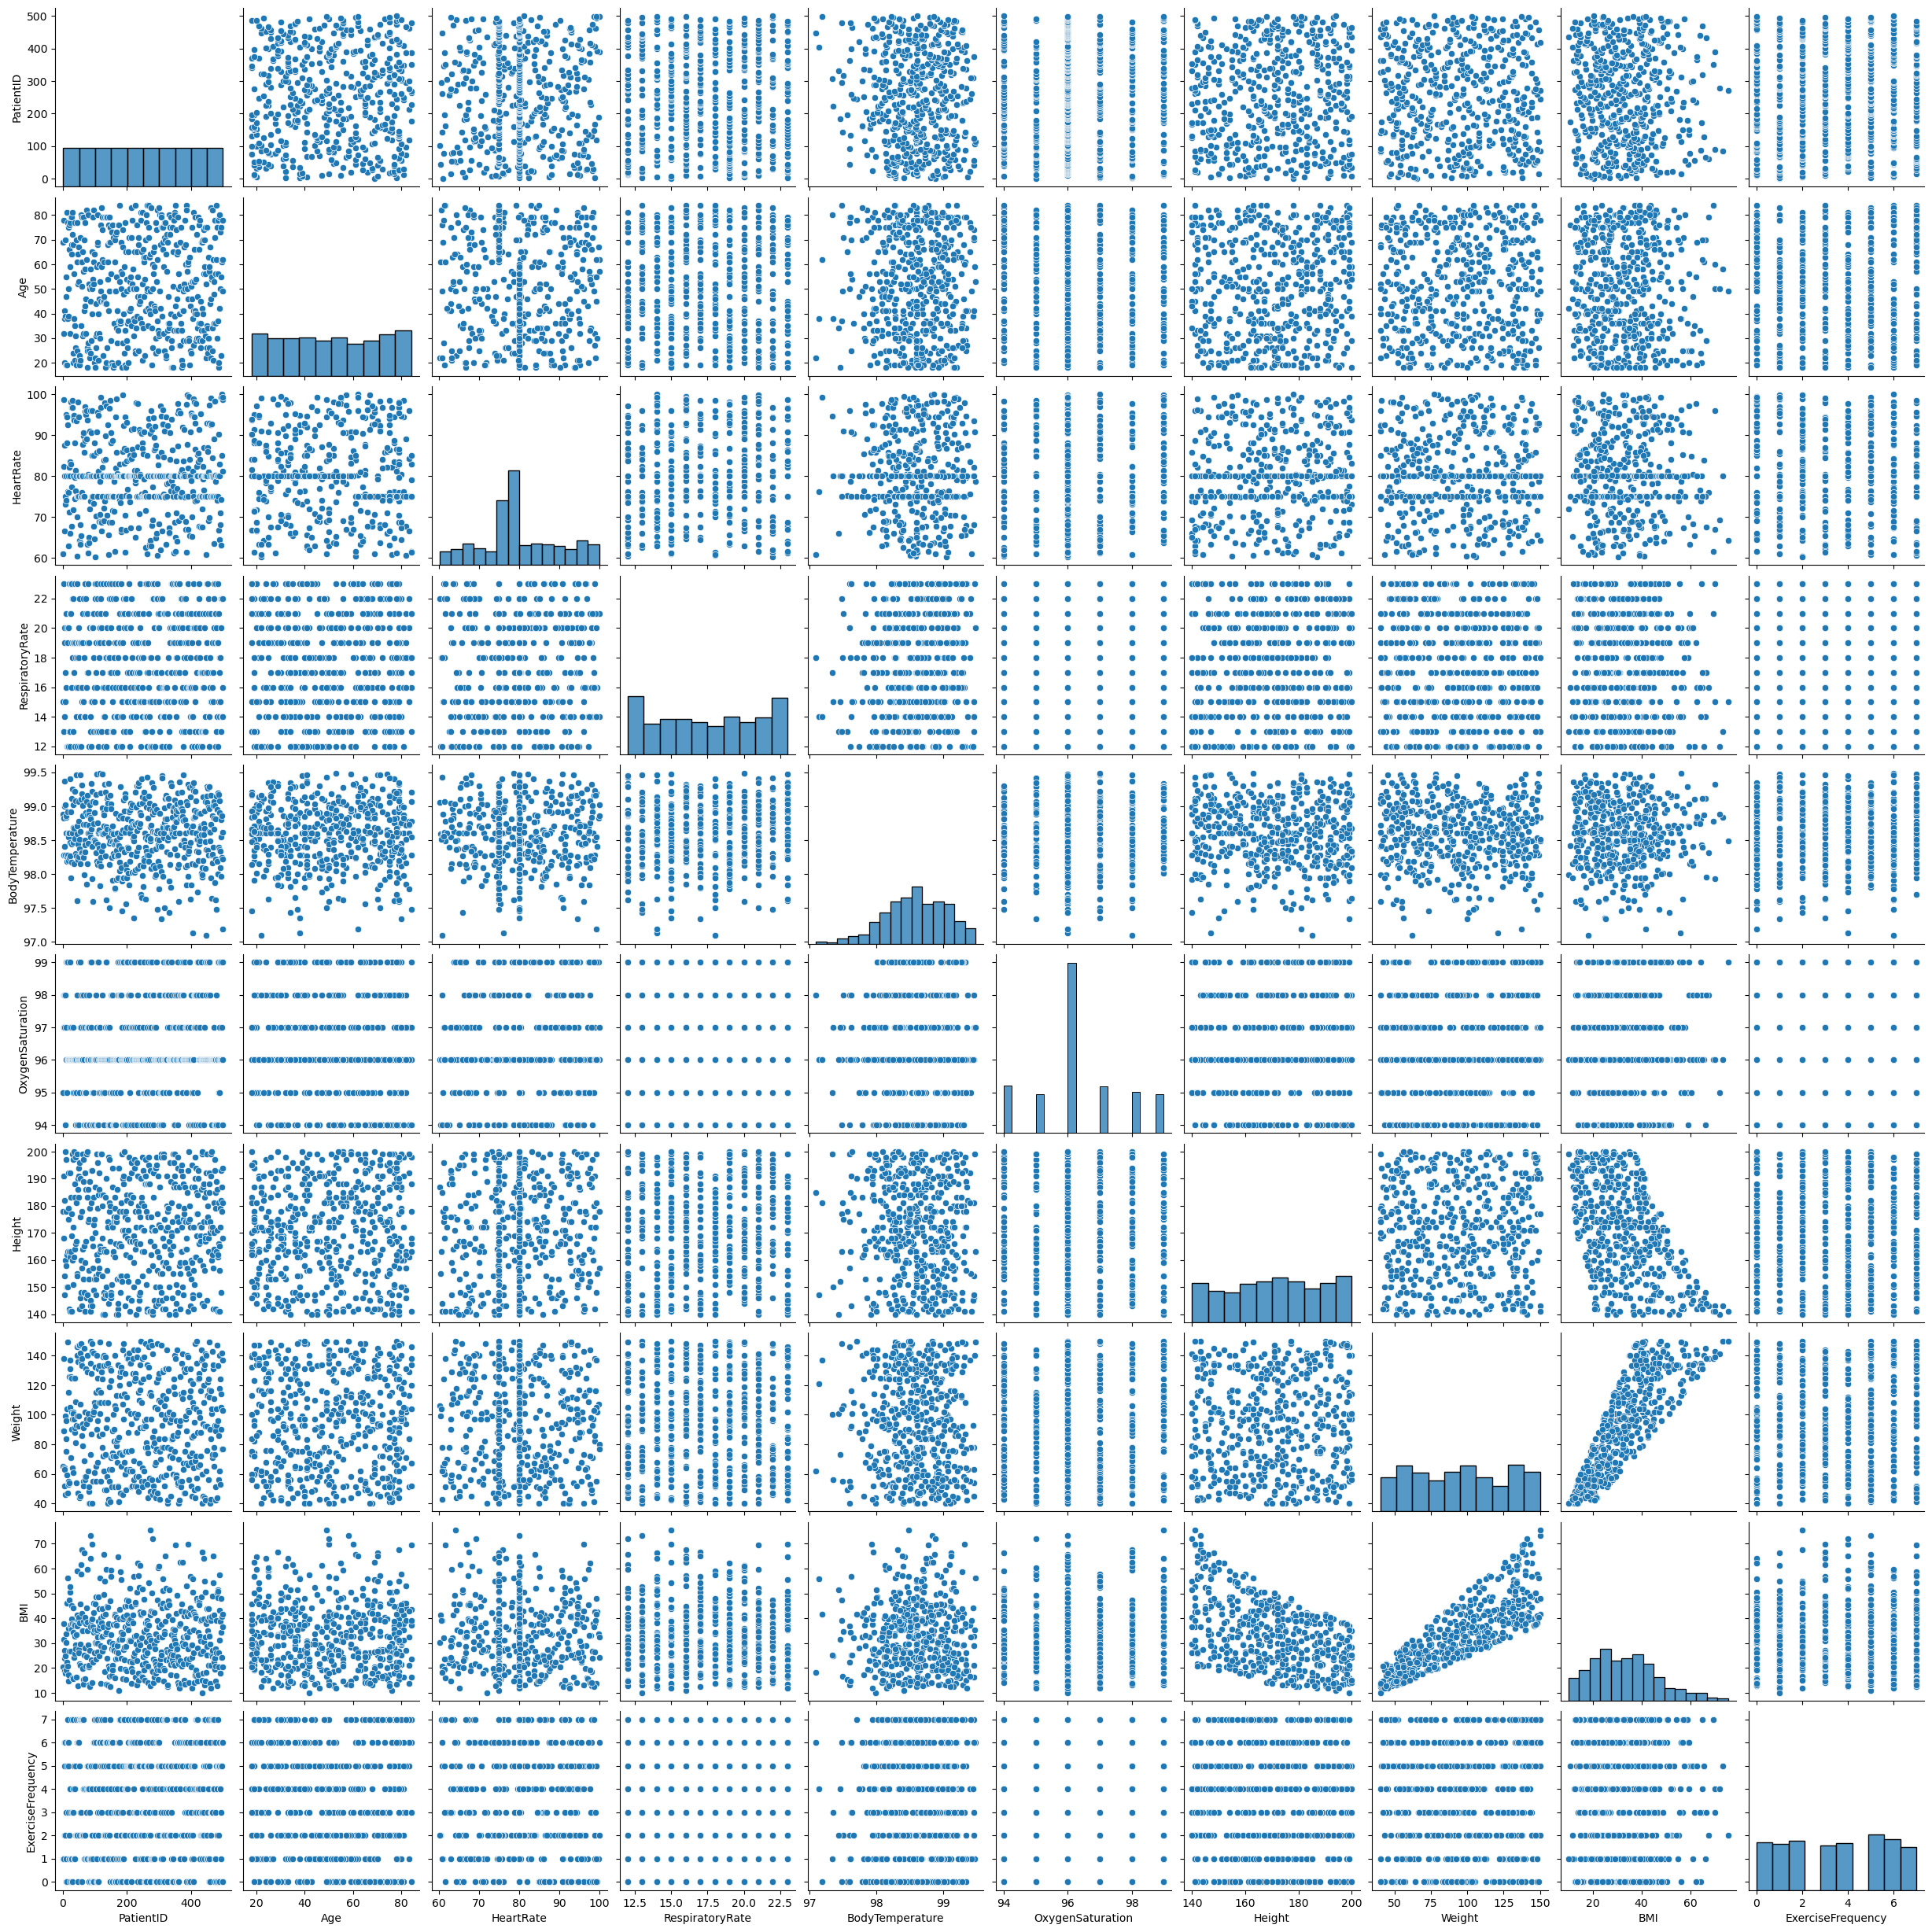

In [14]:
# Data Visualization: Pairplot for relationships
sns.pairplot(df[numeric_cols])
plt.show()

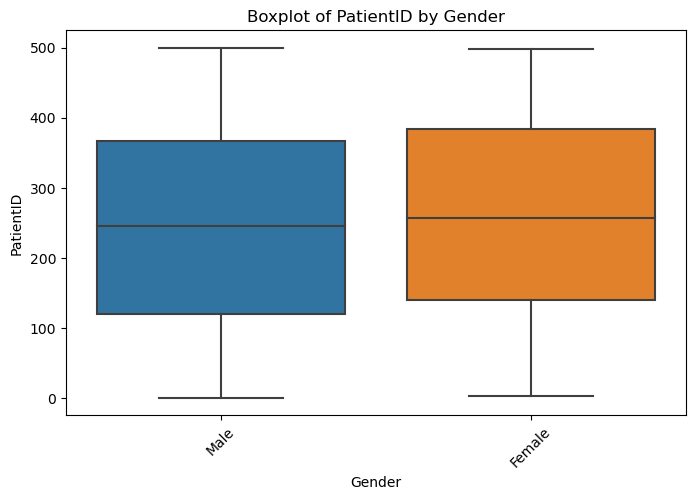

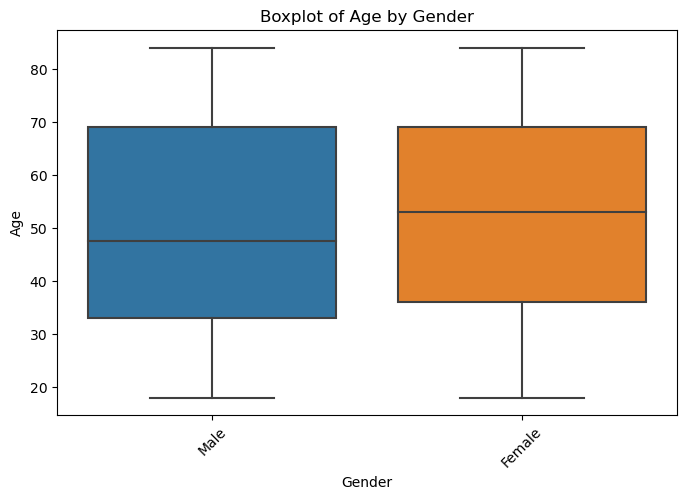

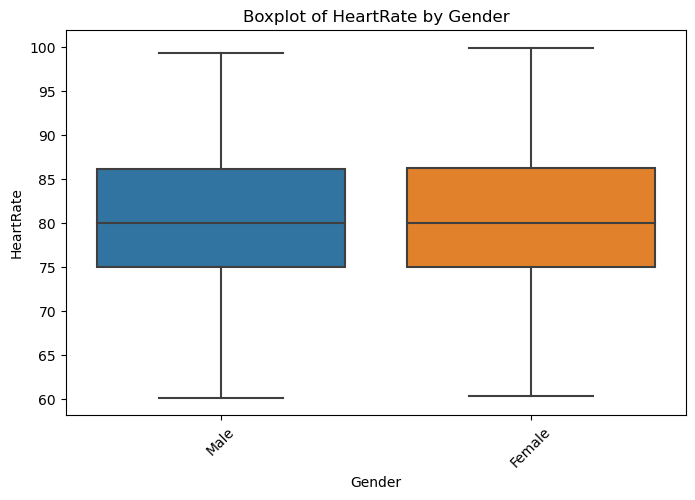

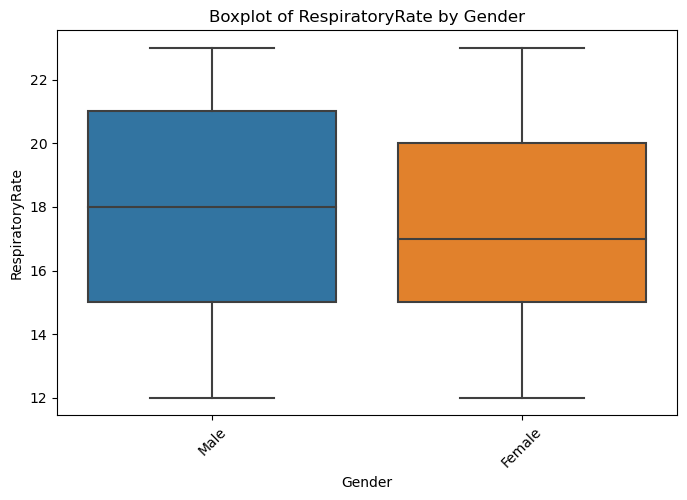

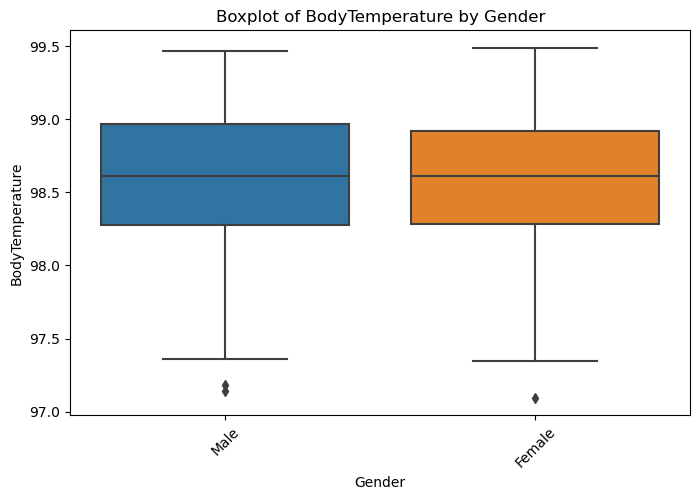

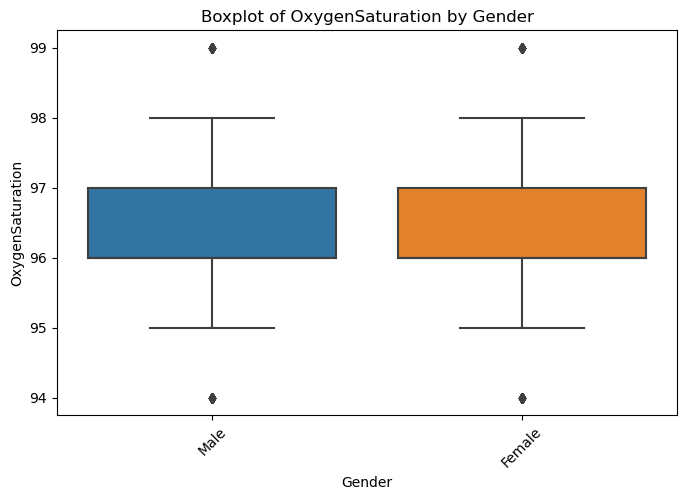

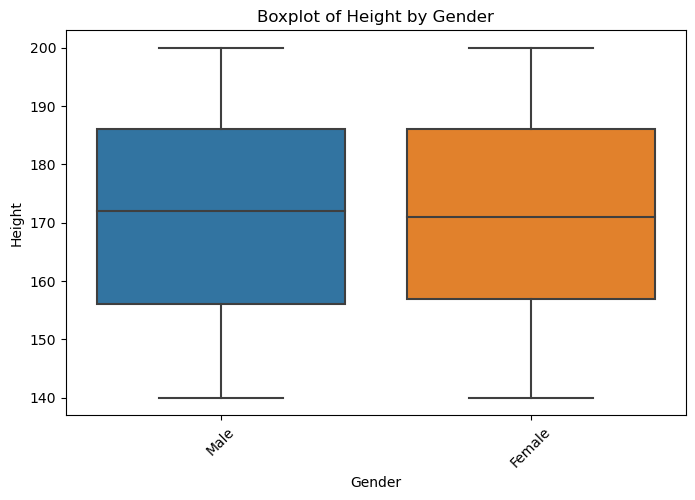

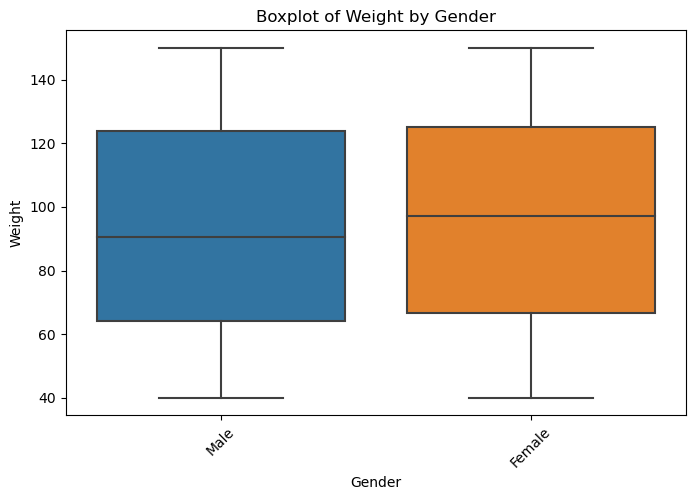

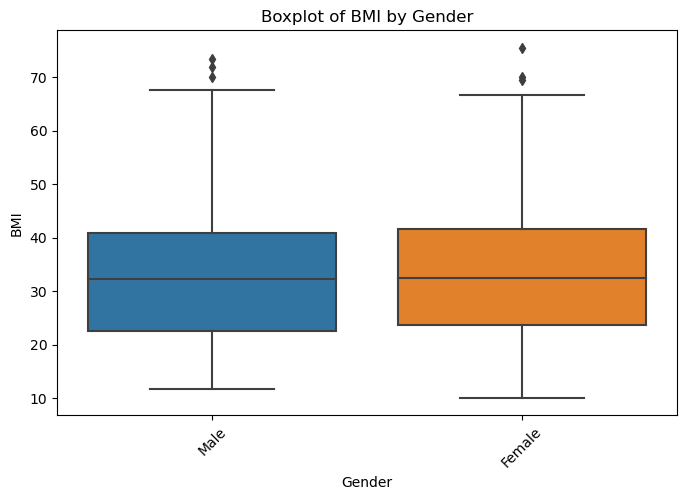

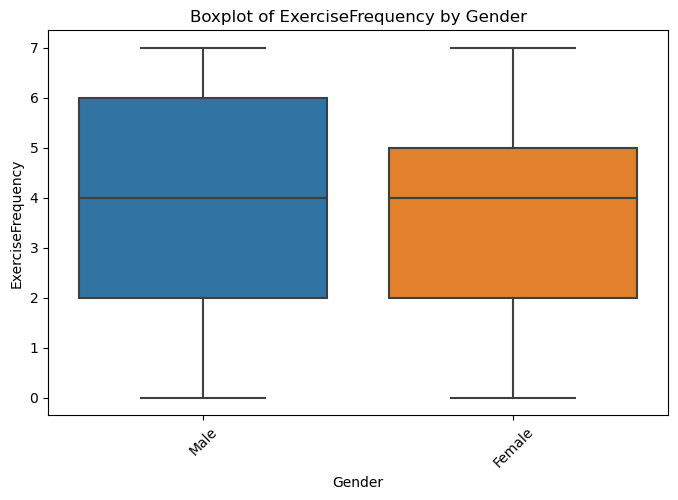

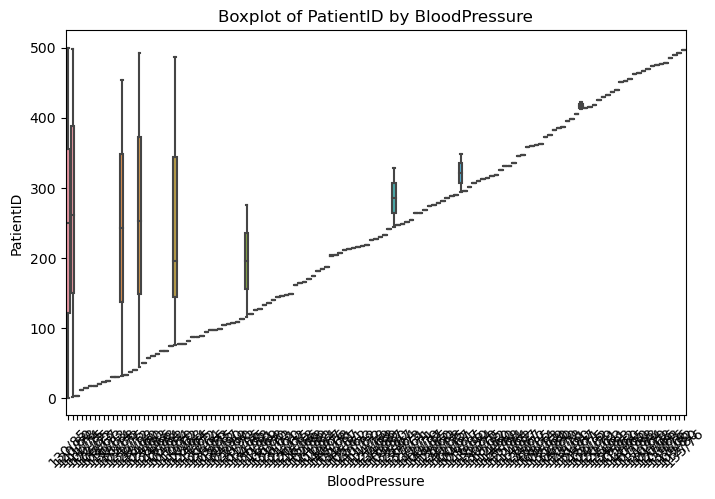

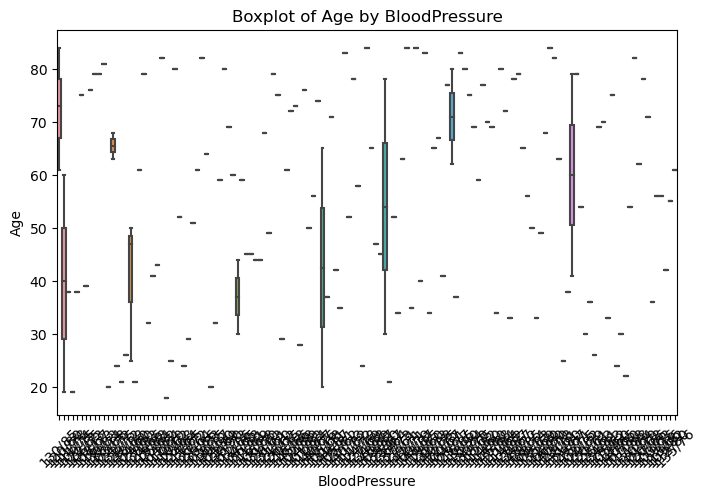

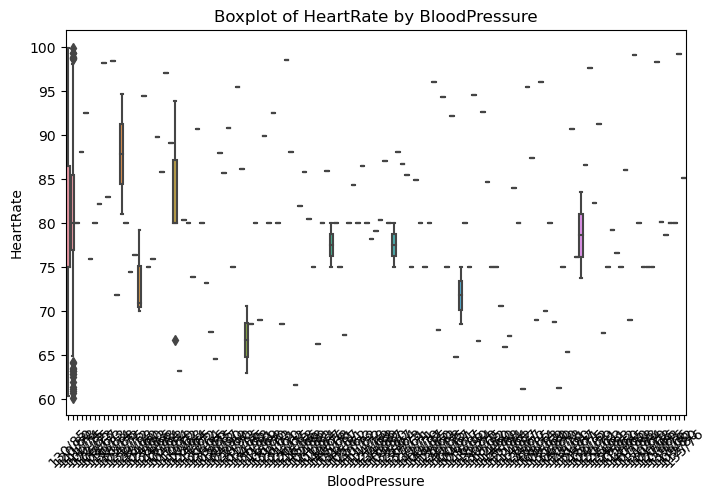

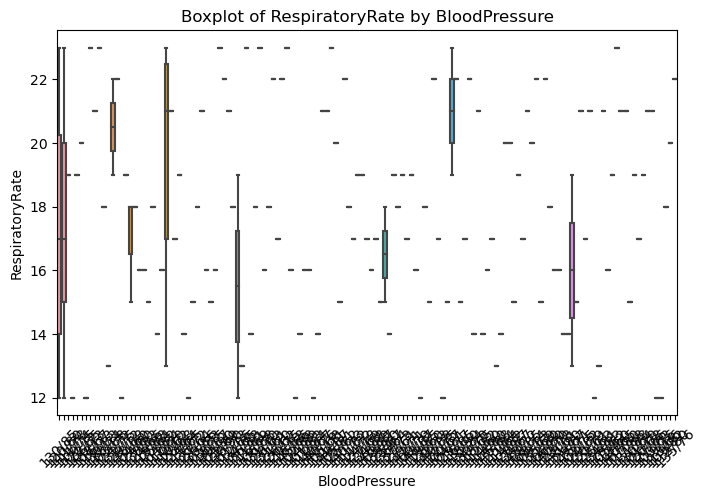

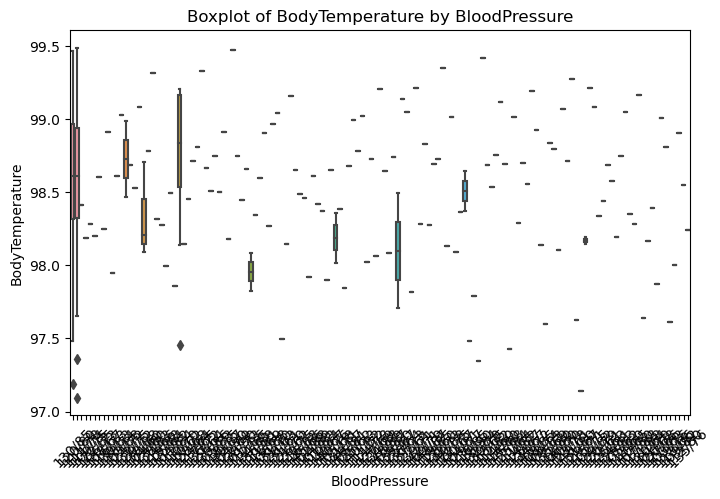

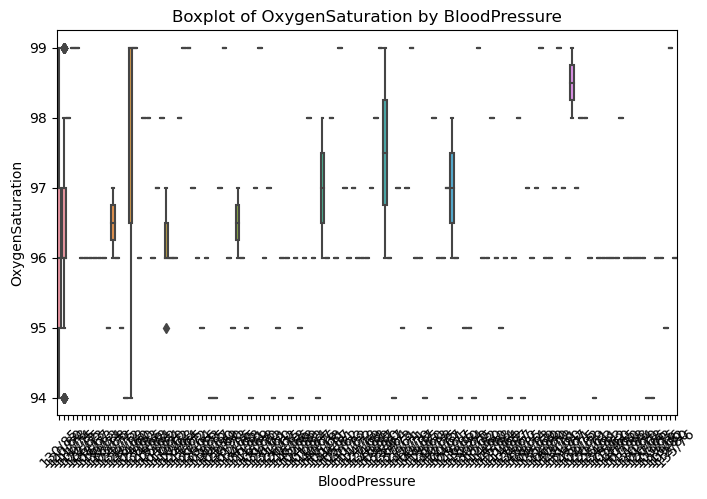

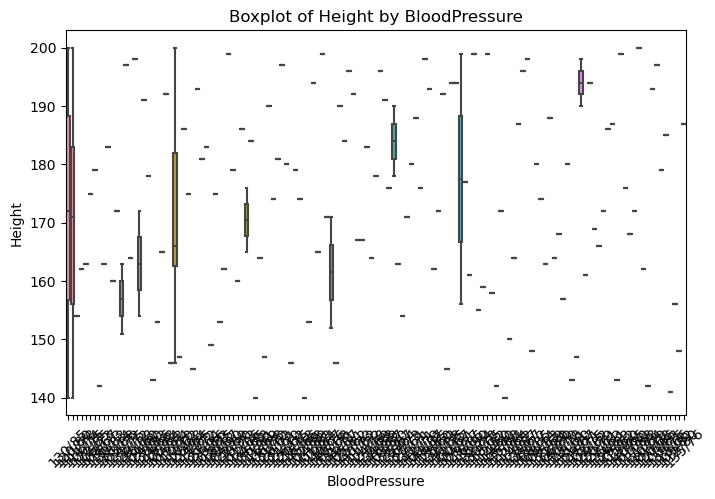

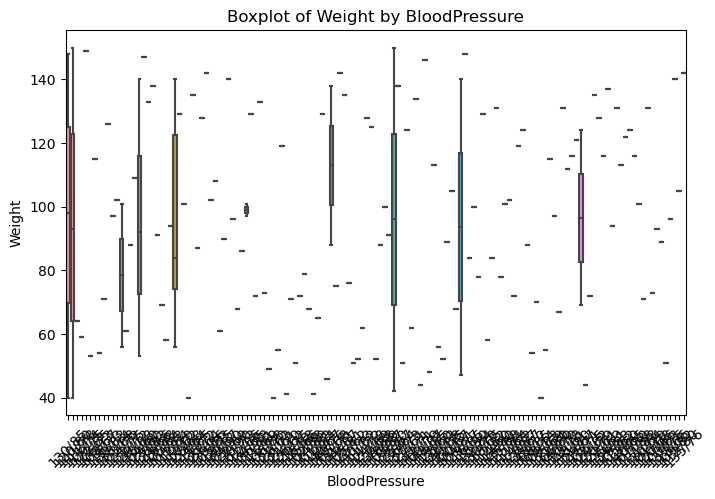

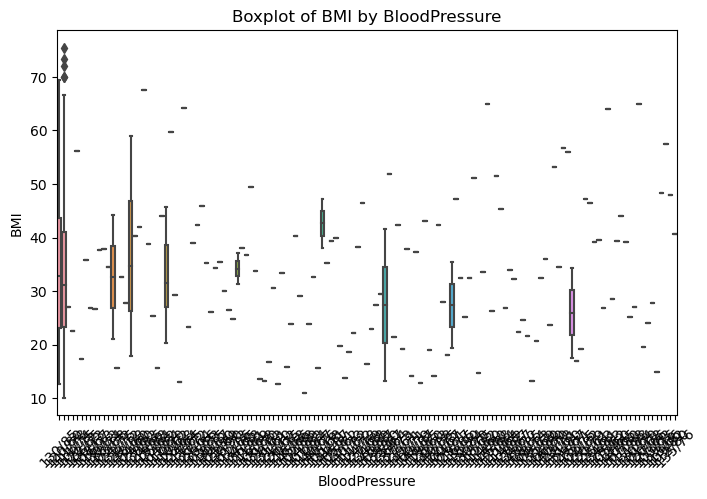

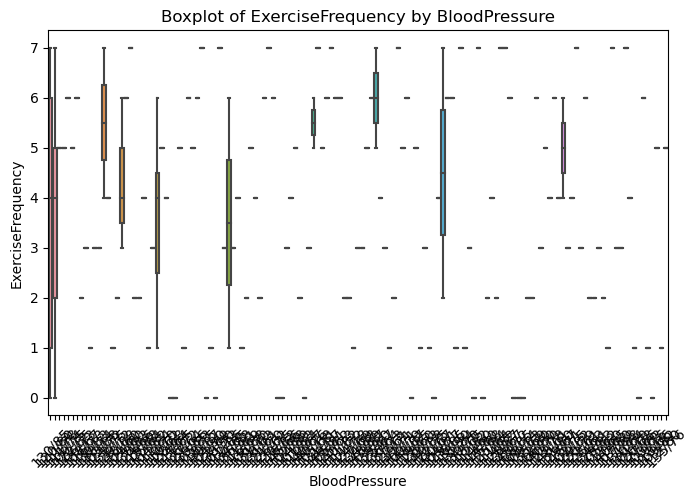

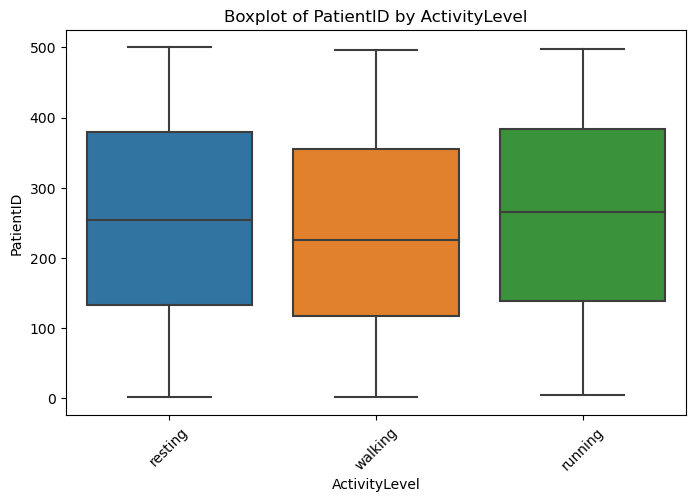

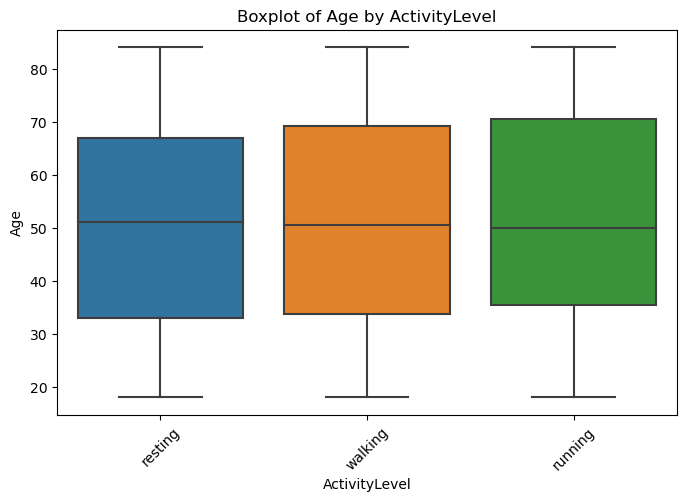

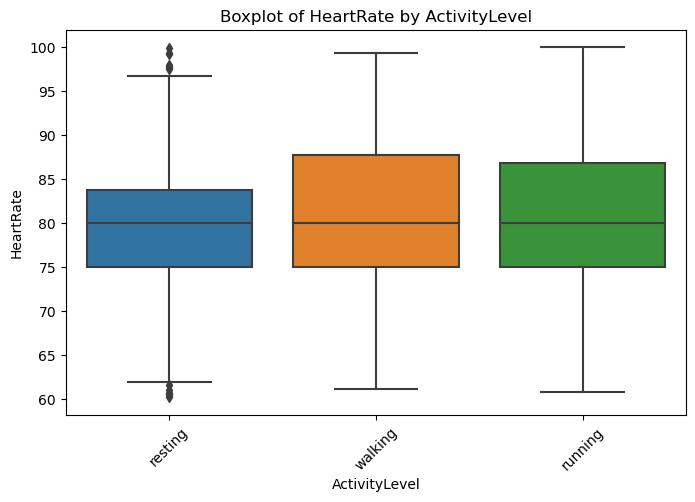

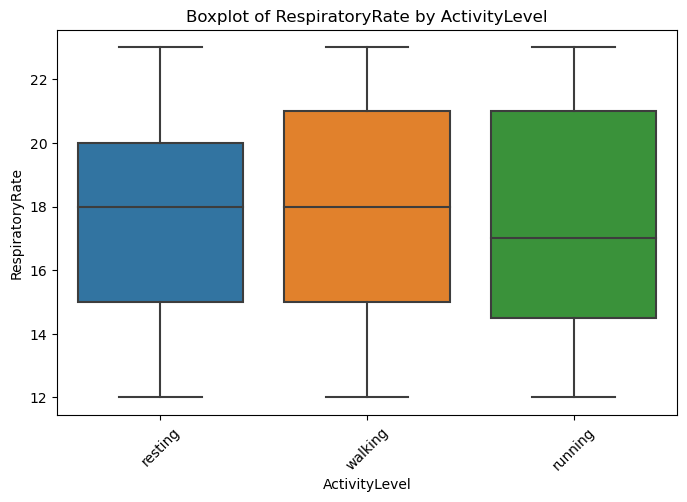

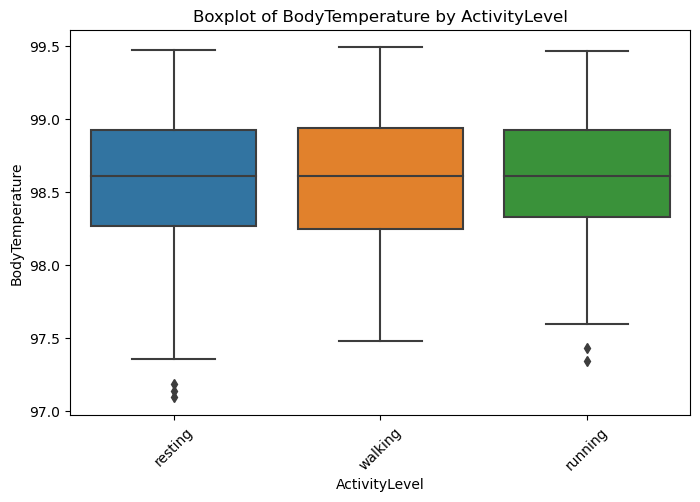

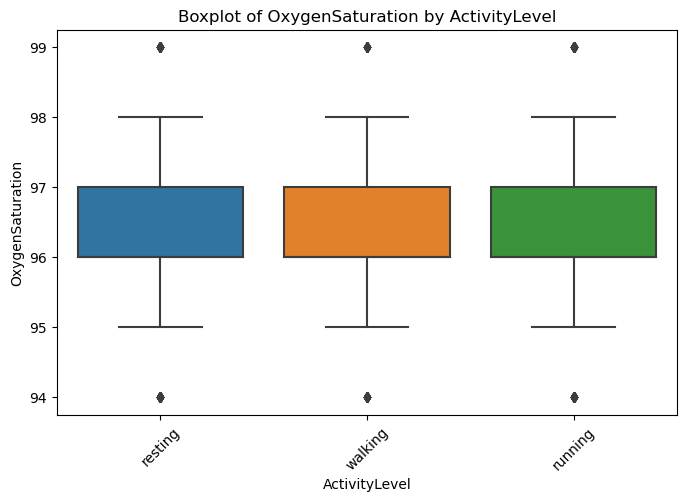

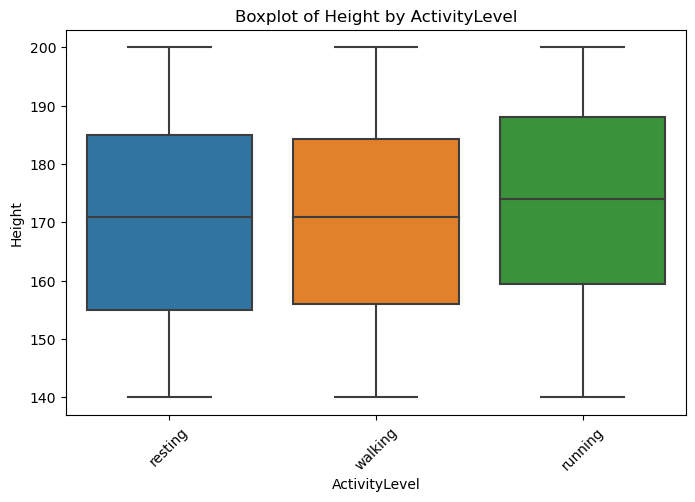

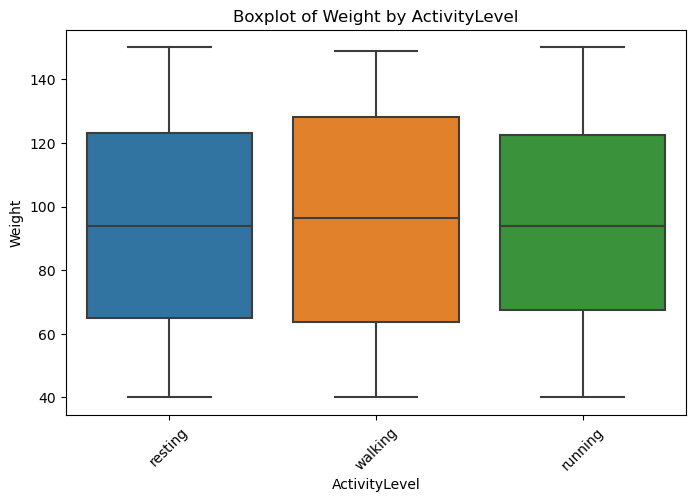

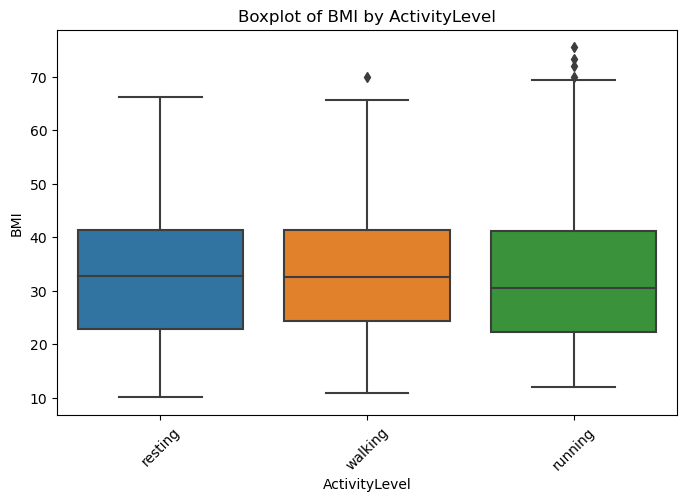

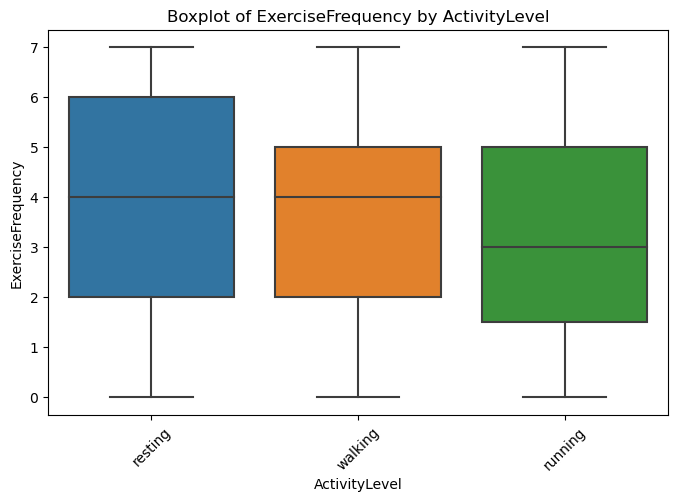

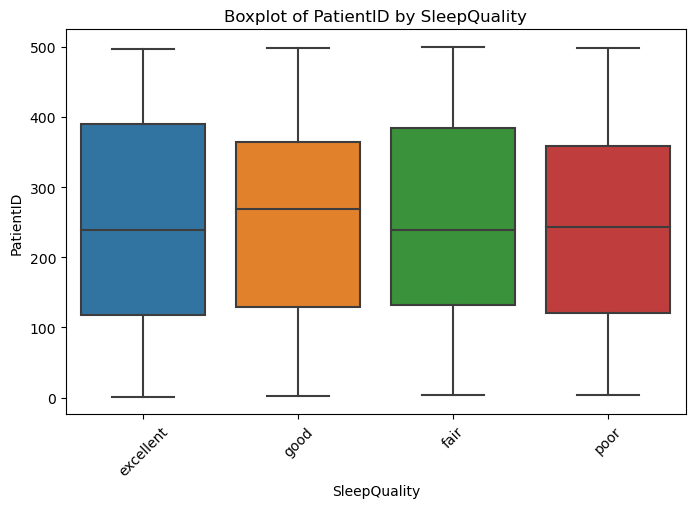

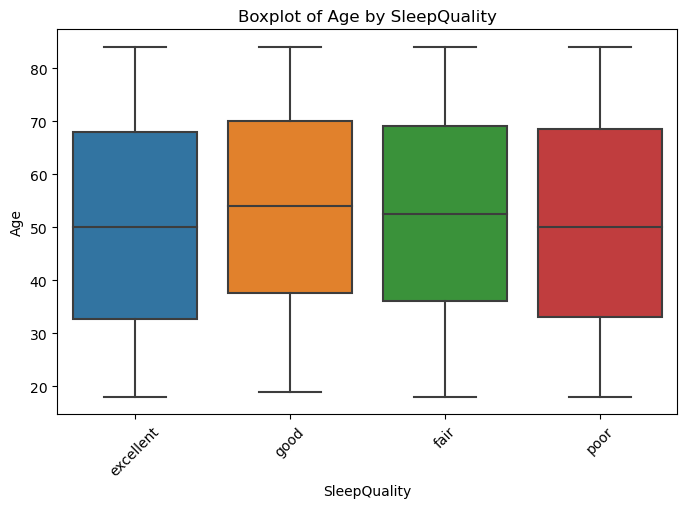

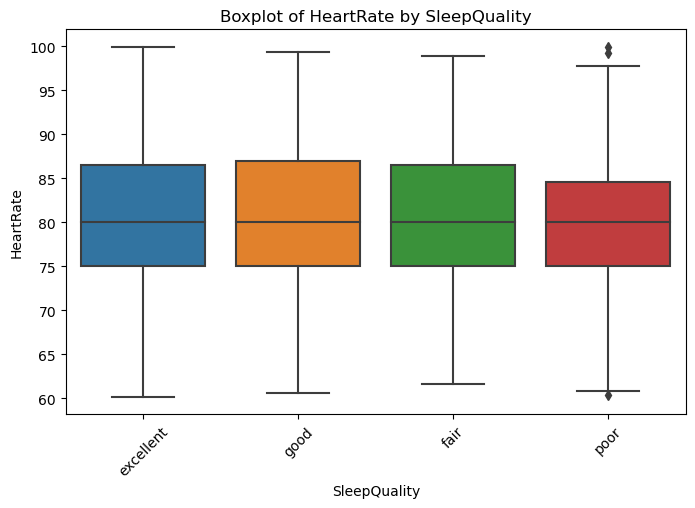

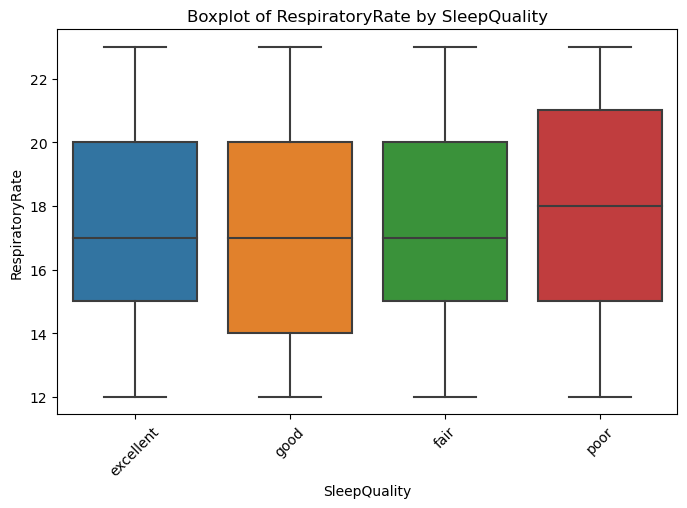

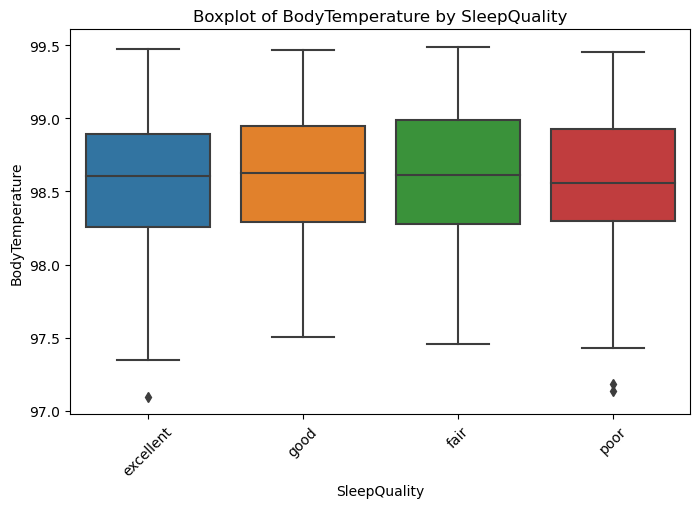

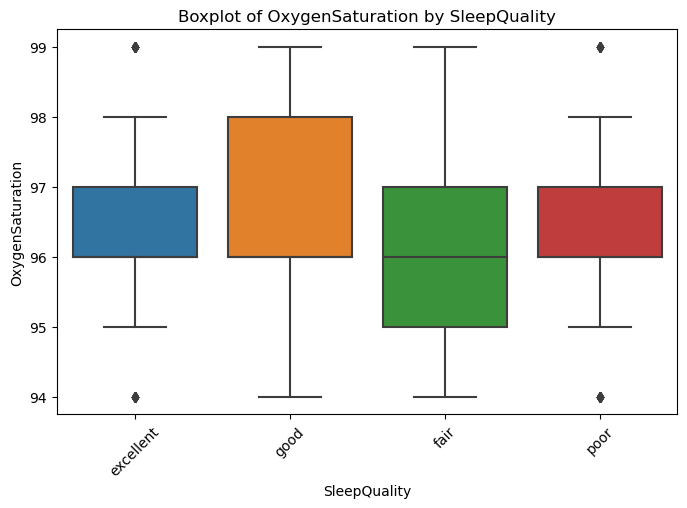

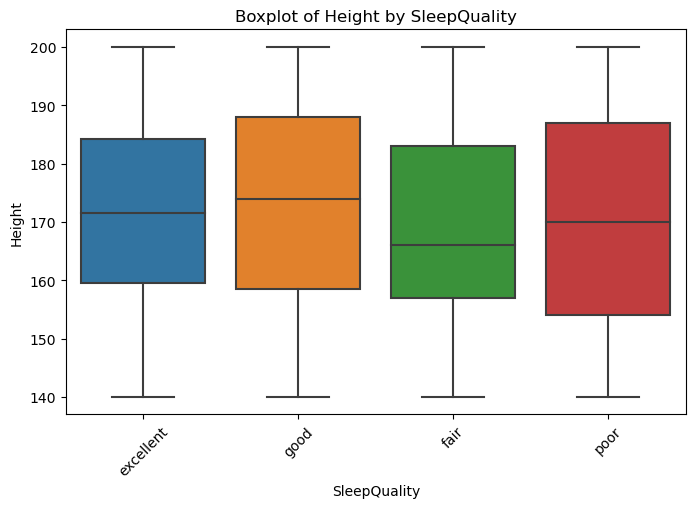

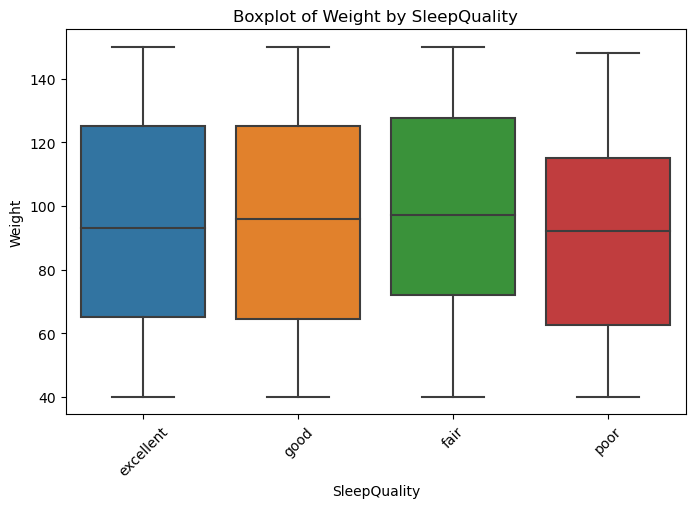

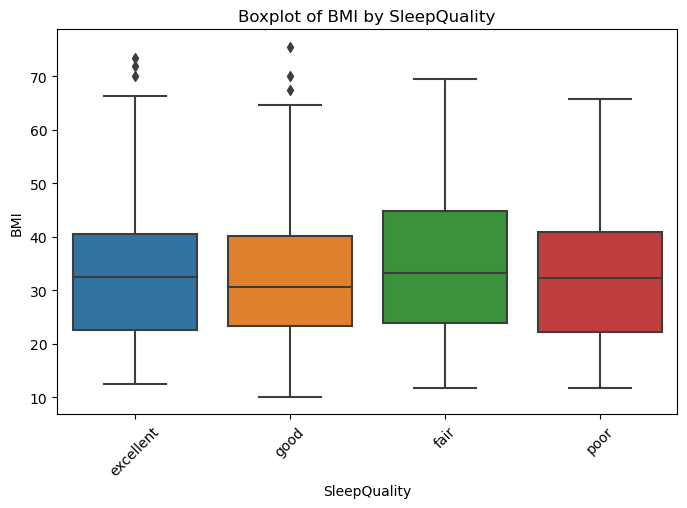

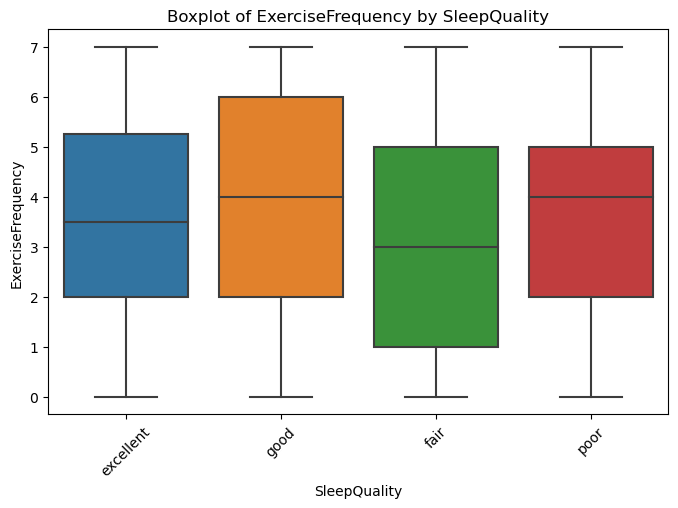

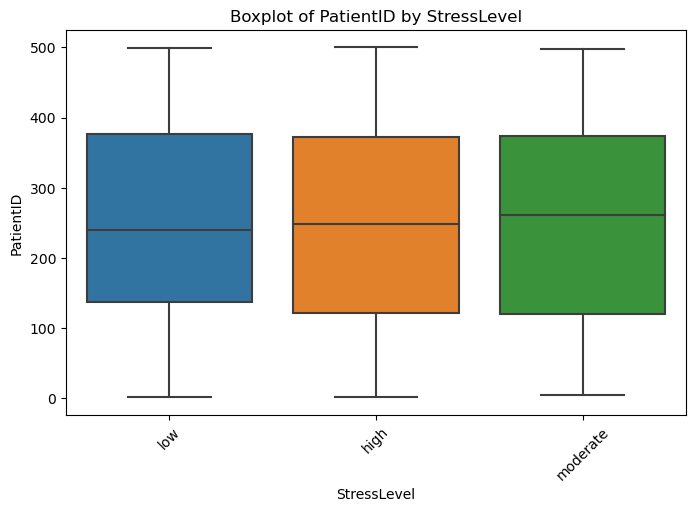

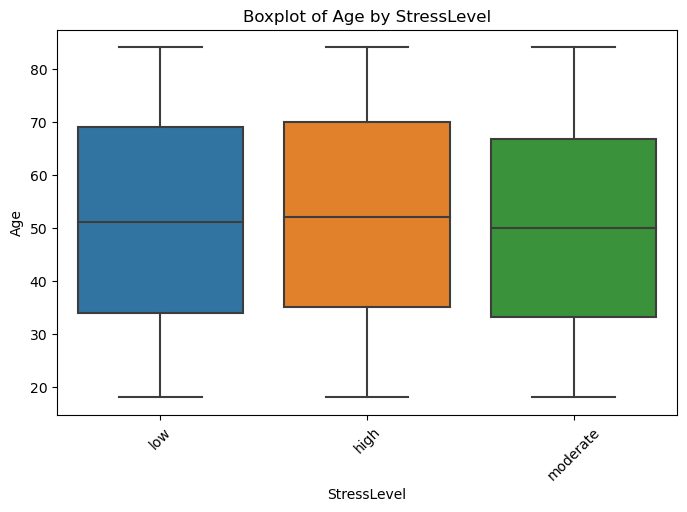

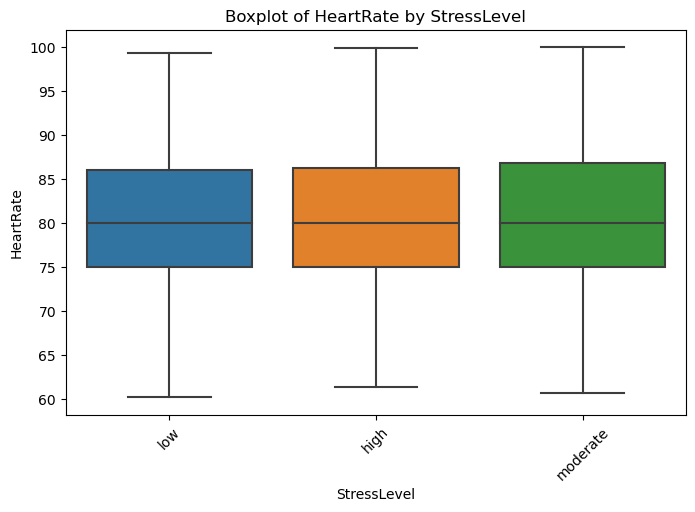

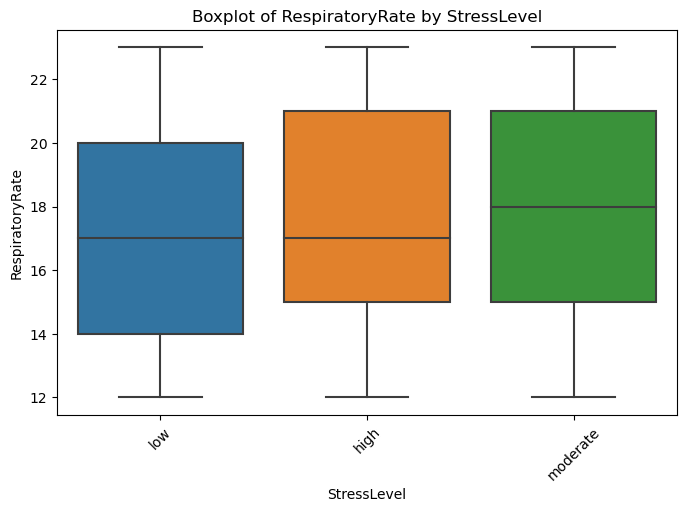

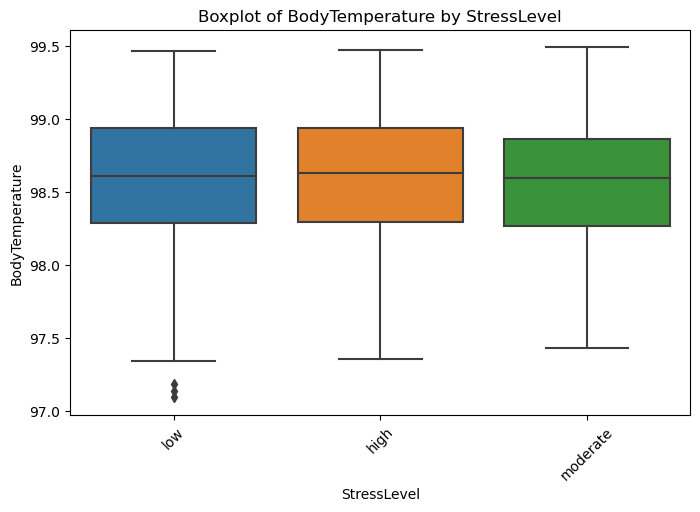

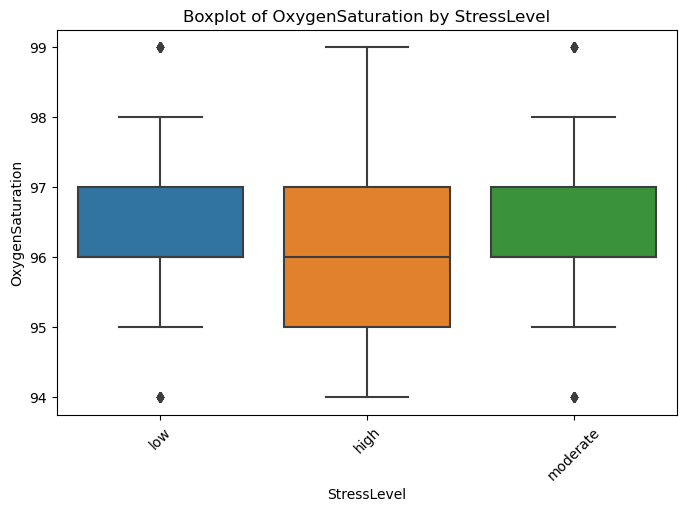

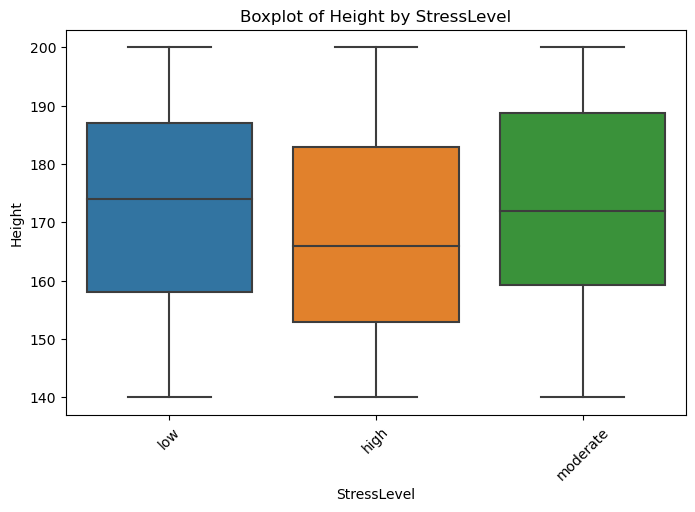

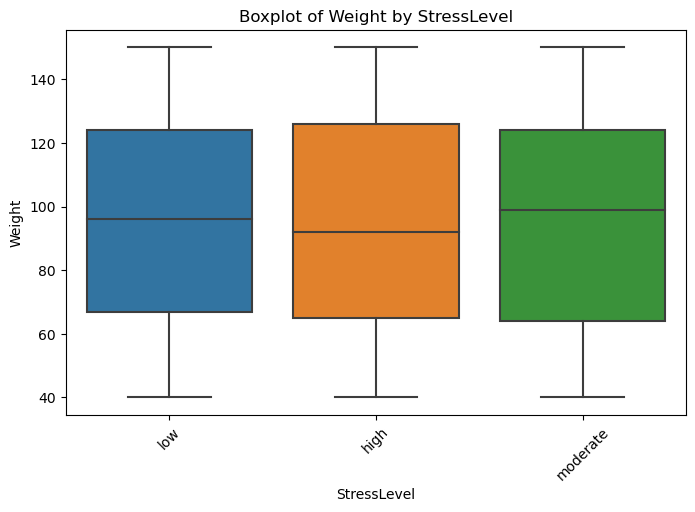

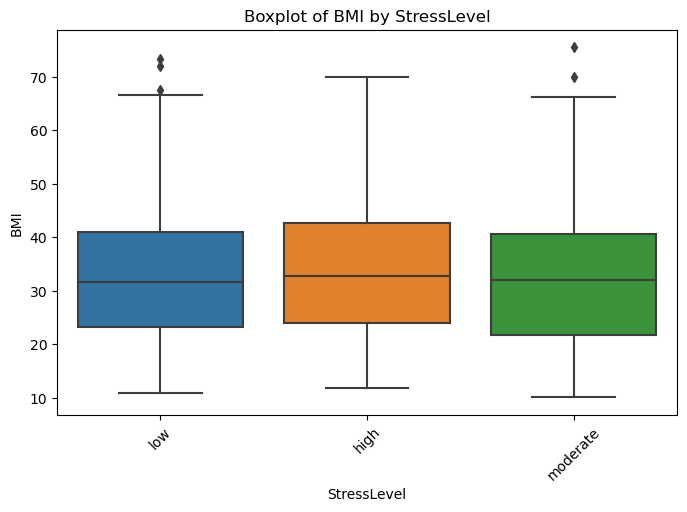

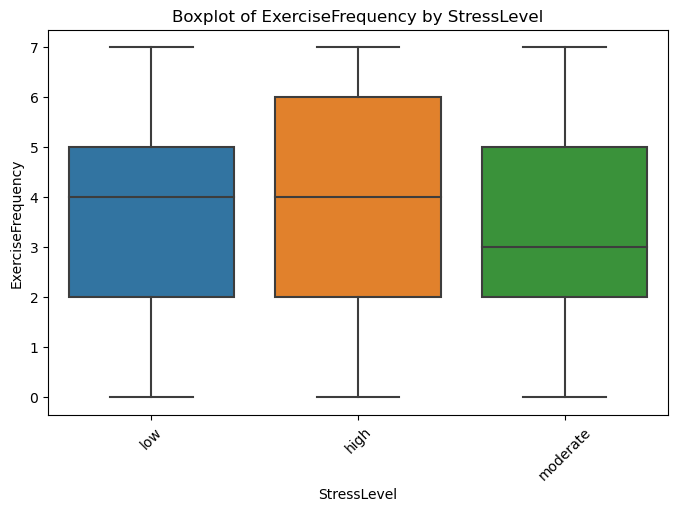

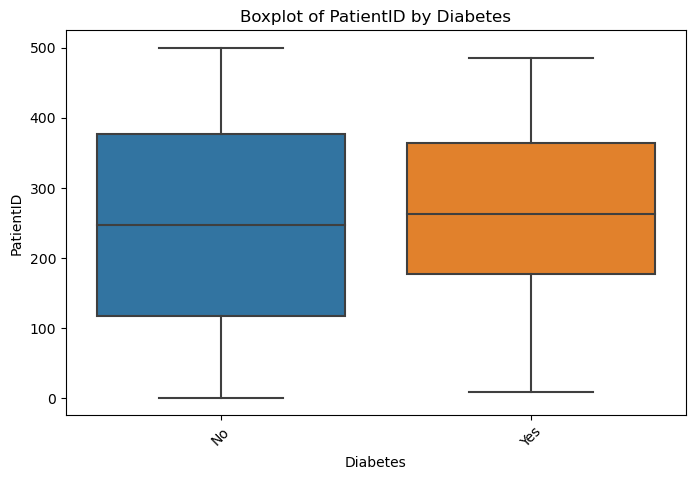

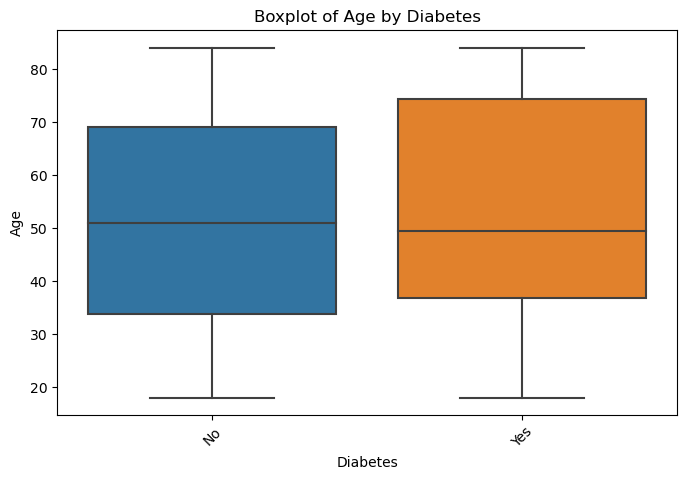

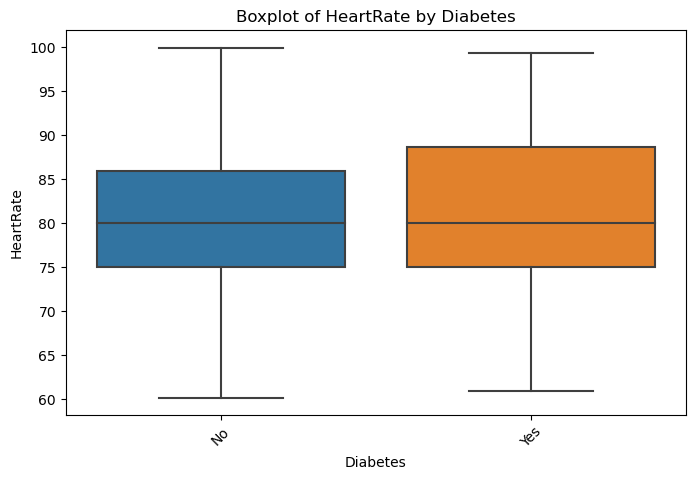

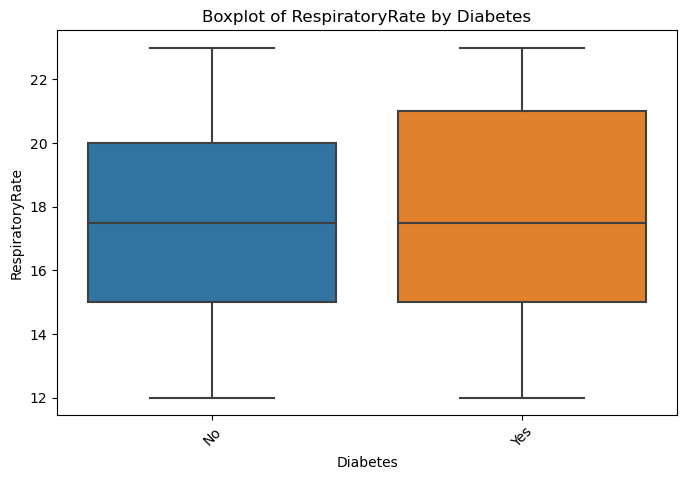

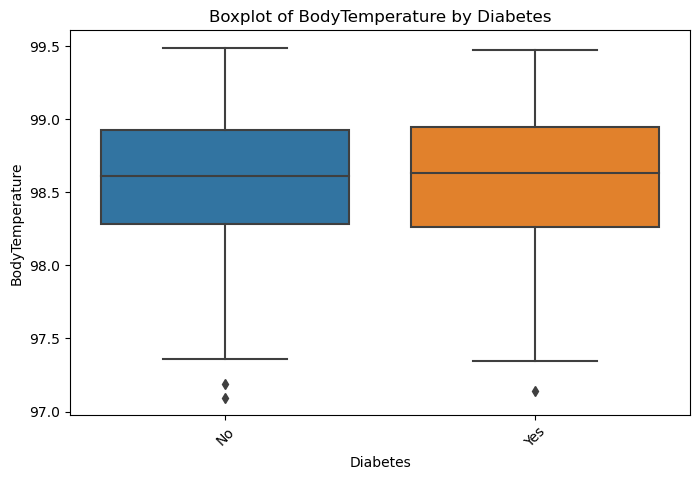

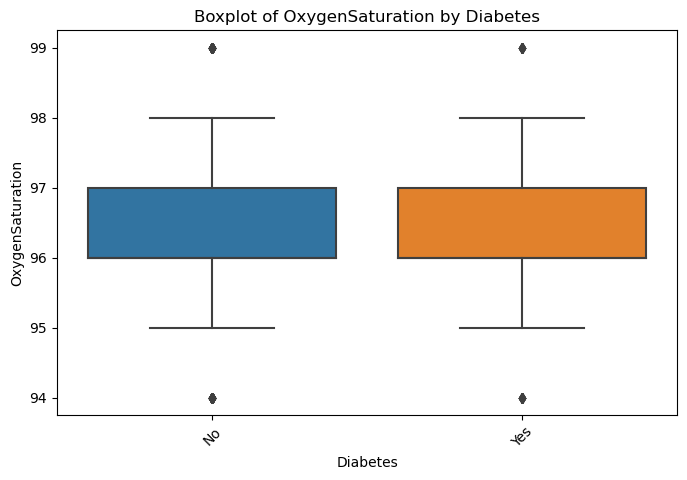

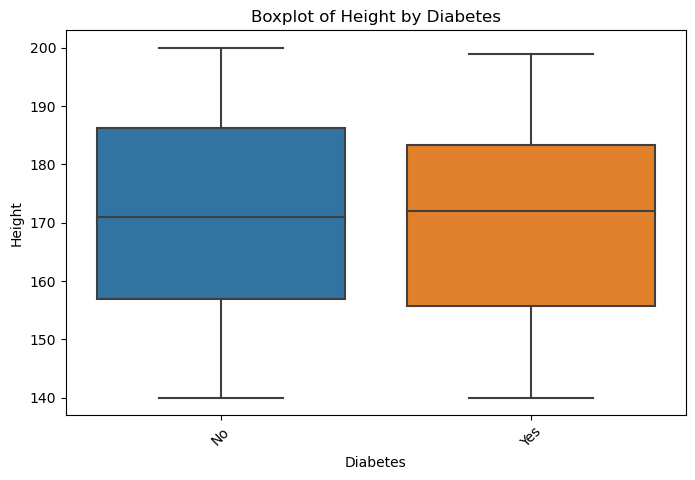

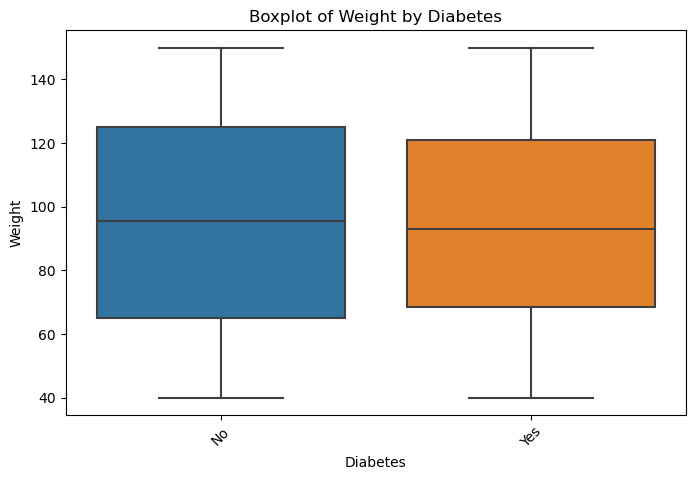

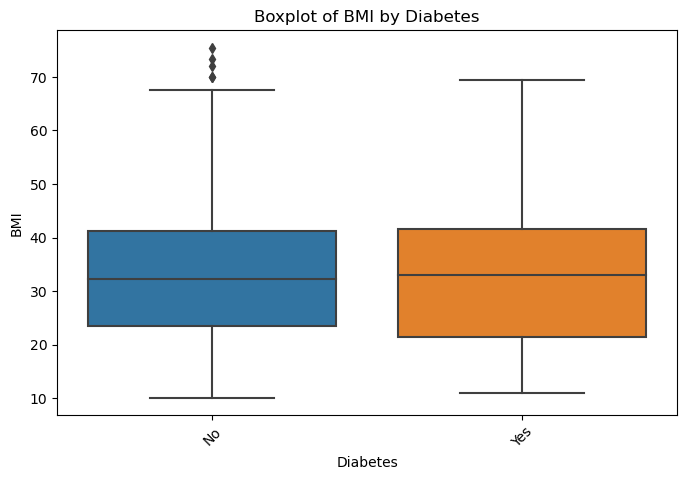

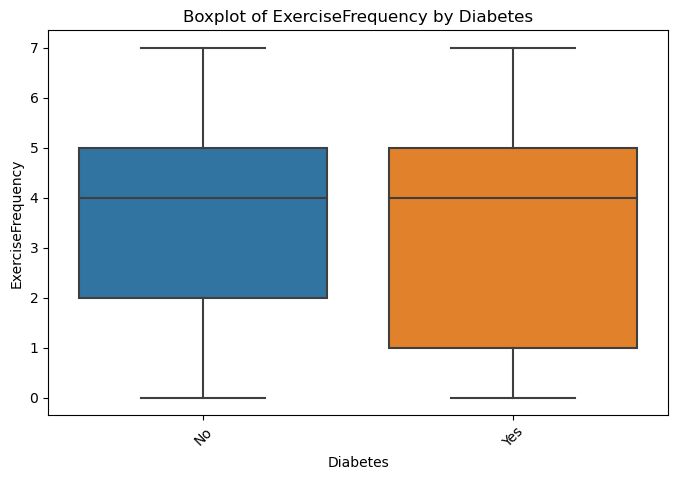

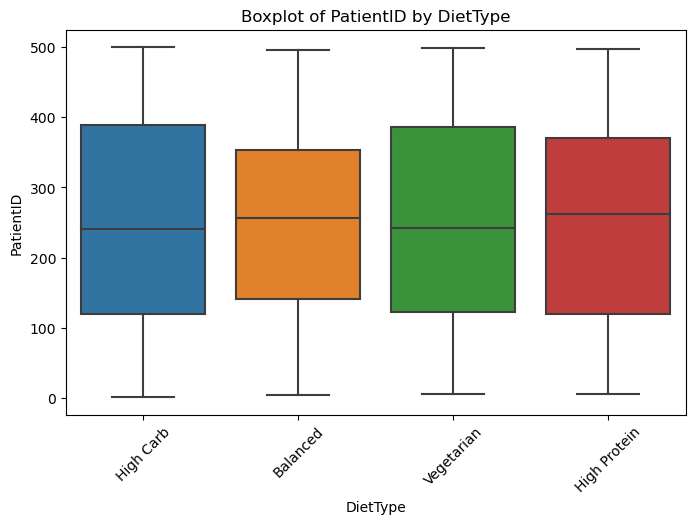

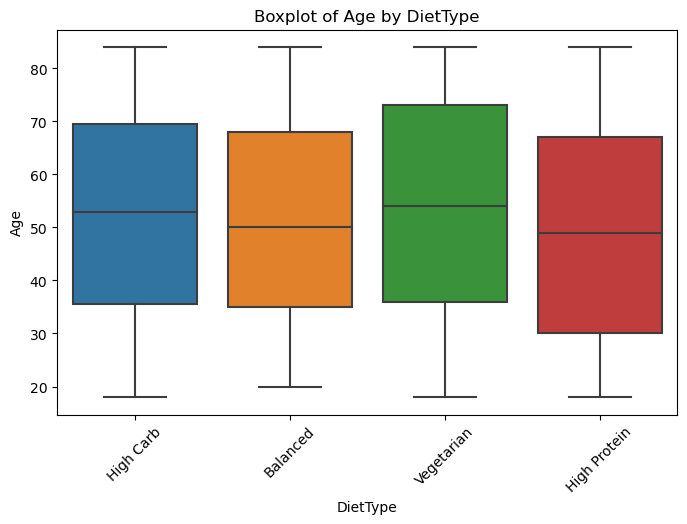

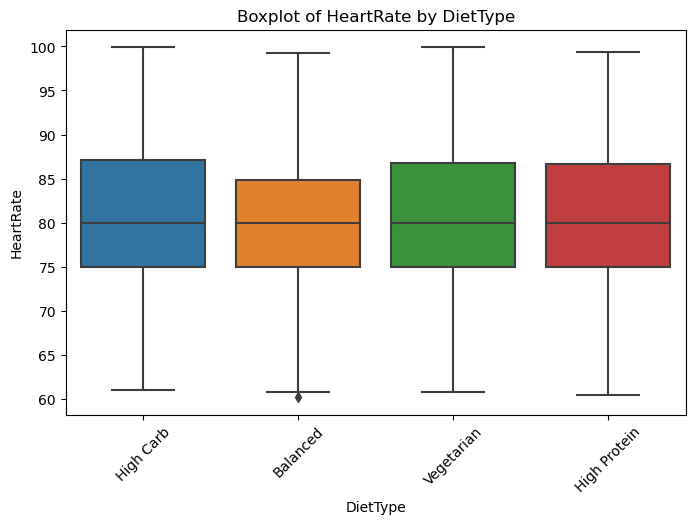

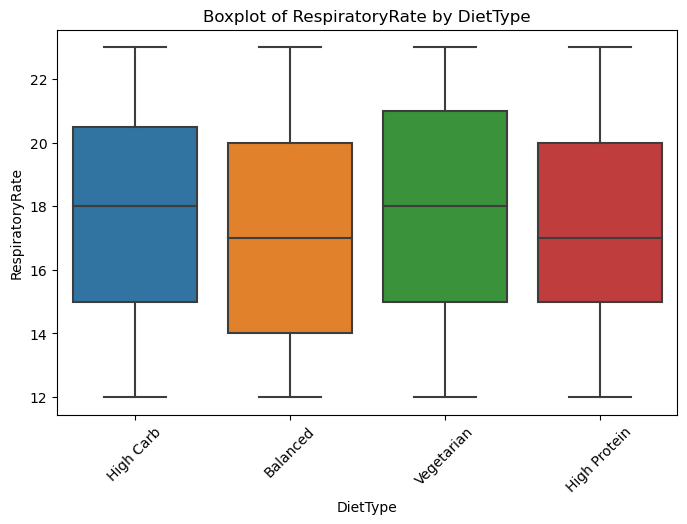

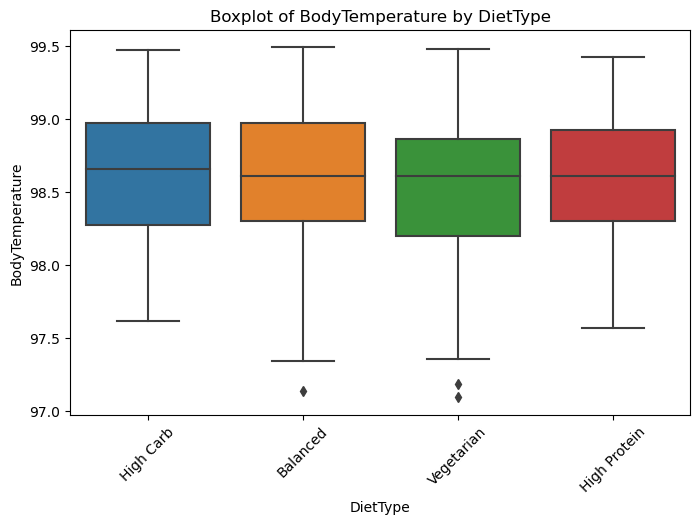

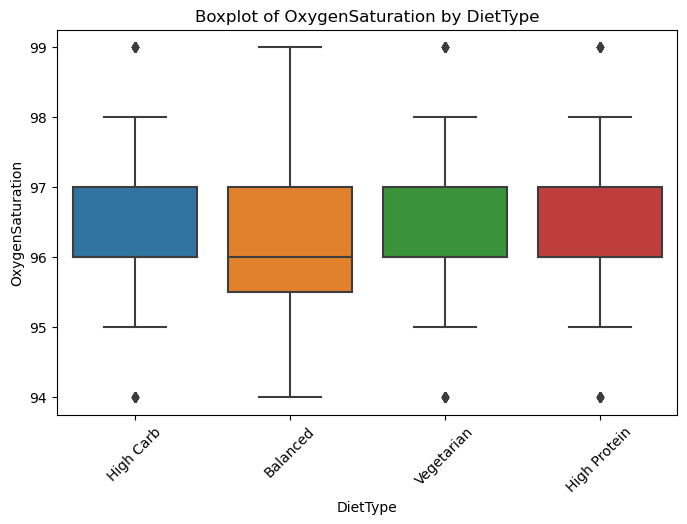

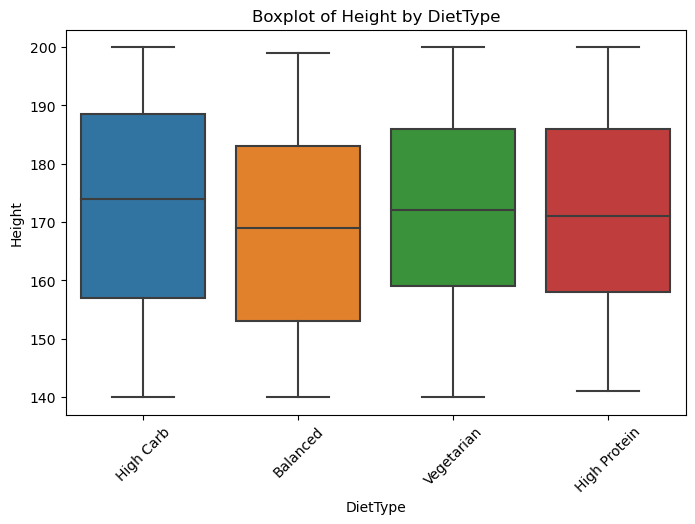

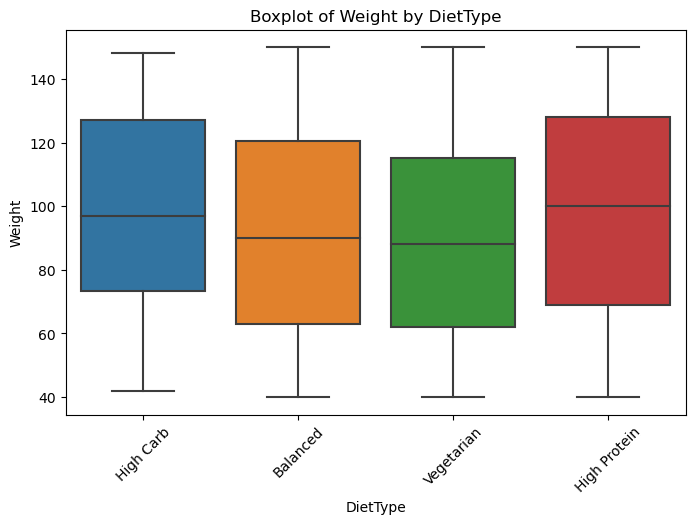

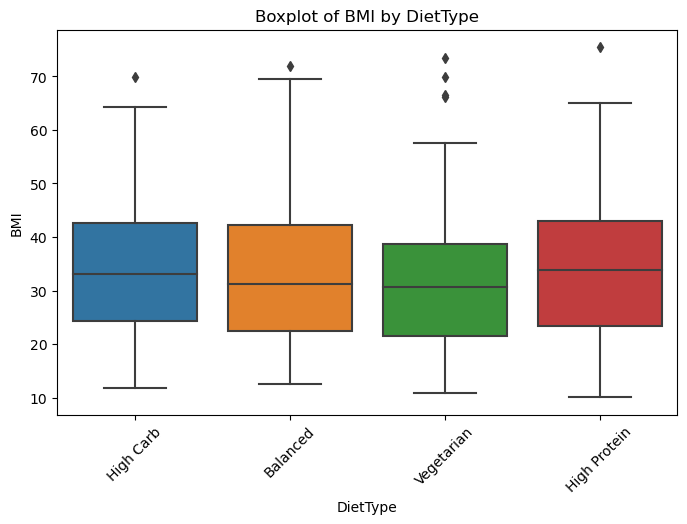

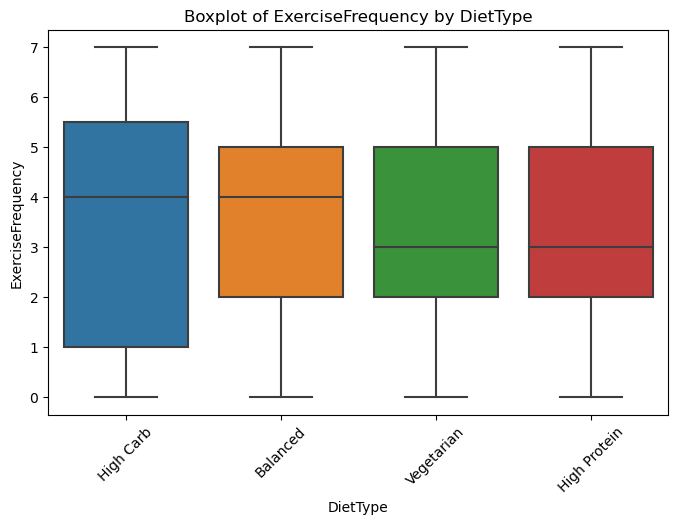

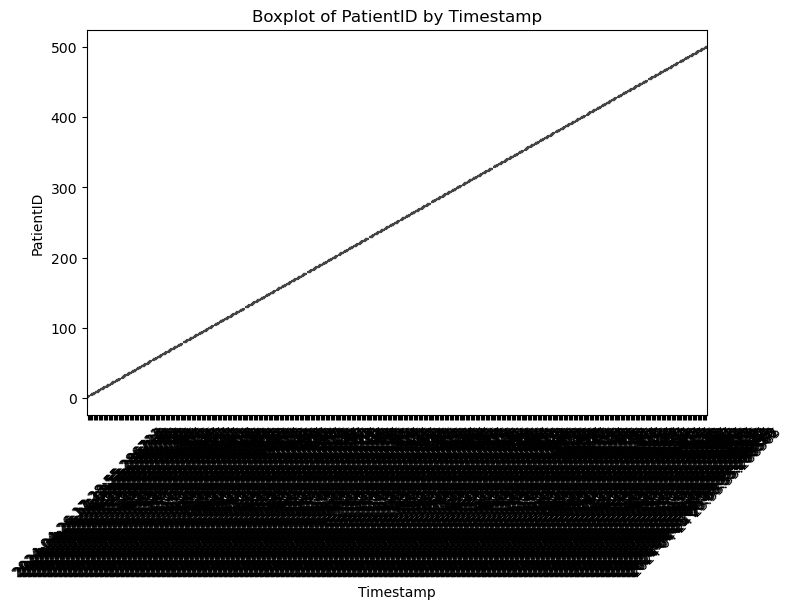

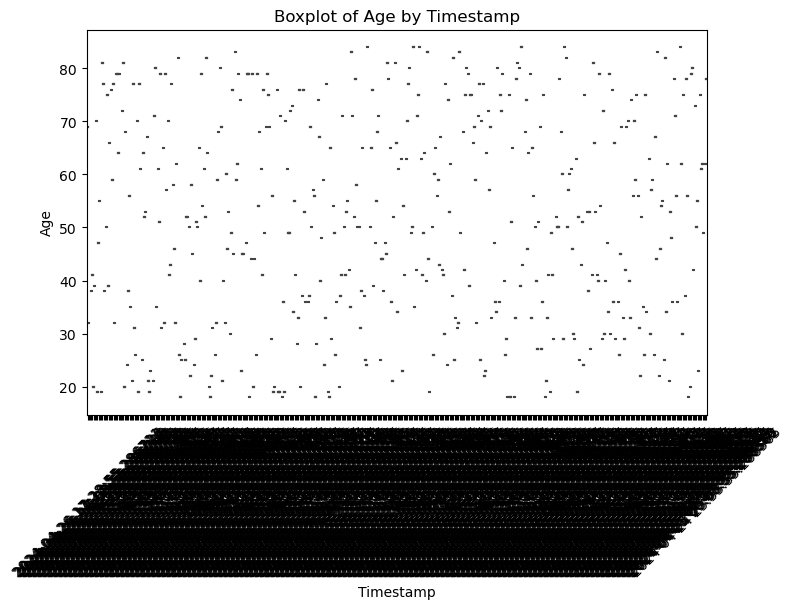

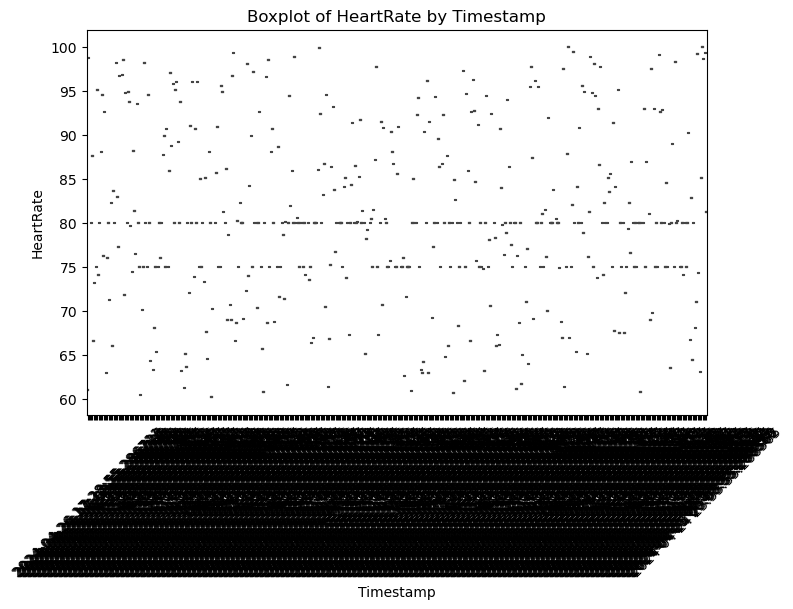

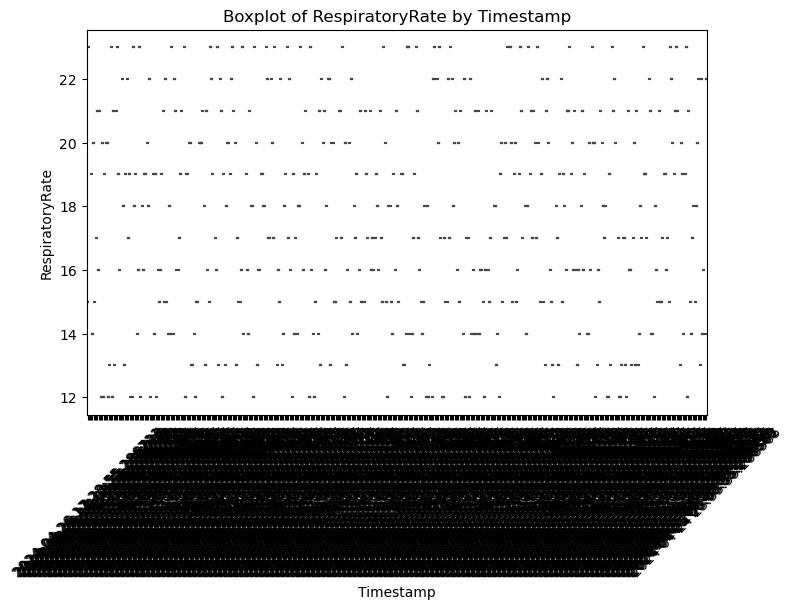

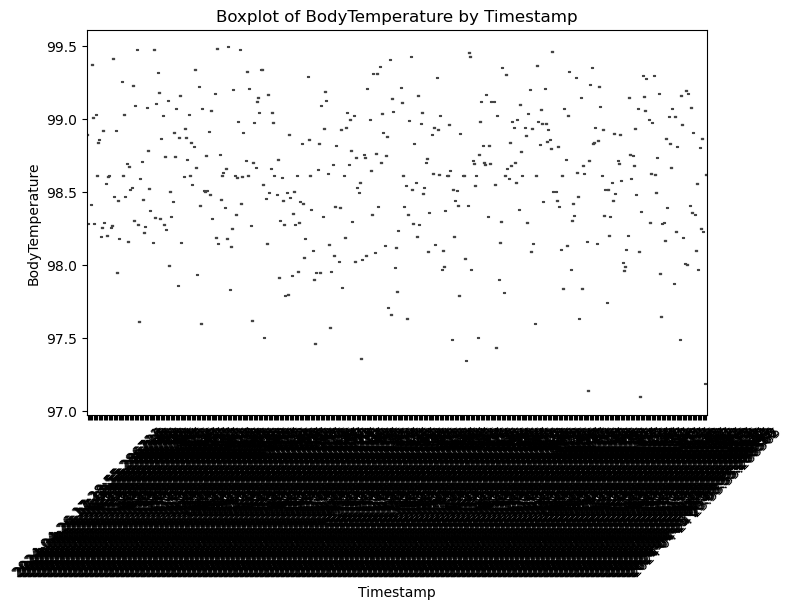

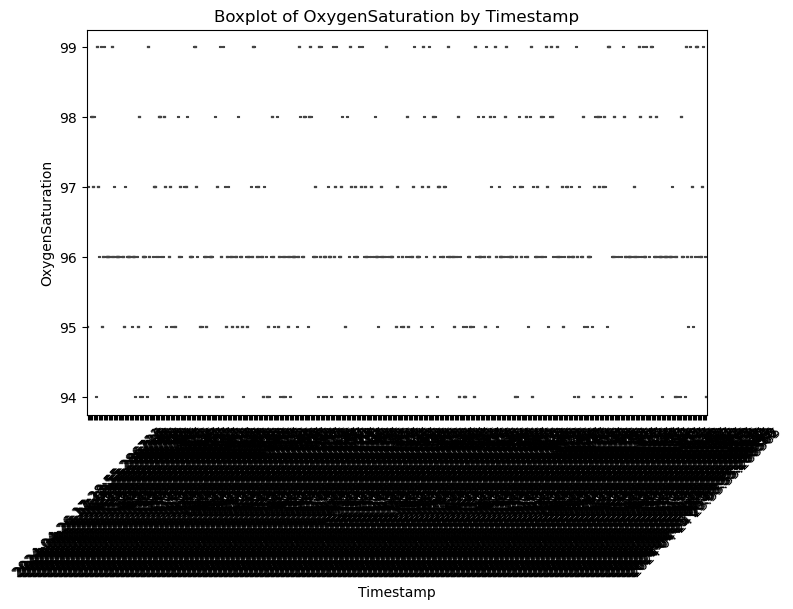

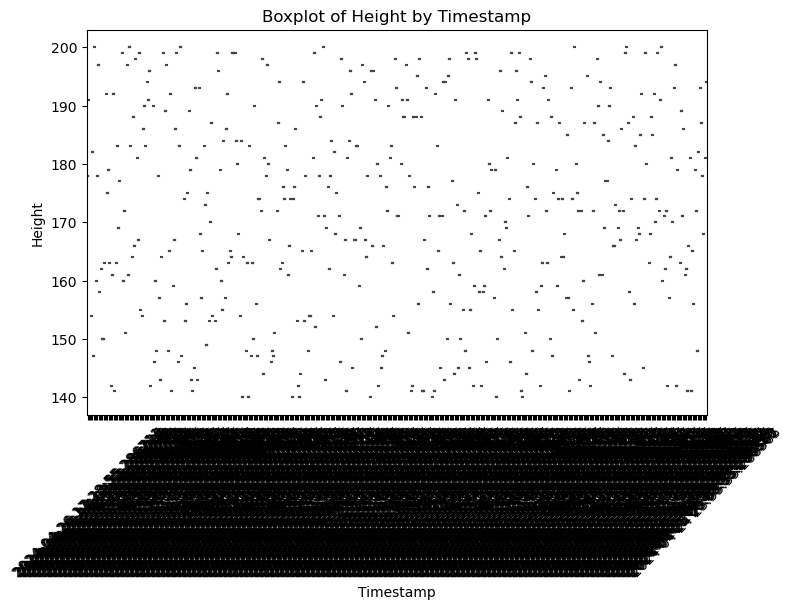

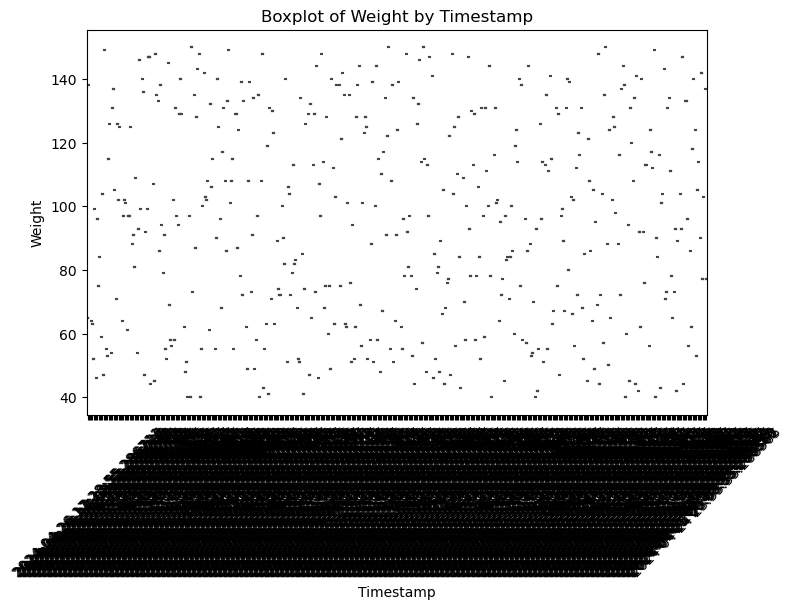

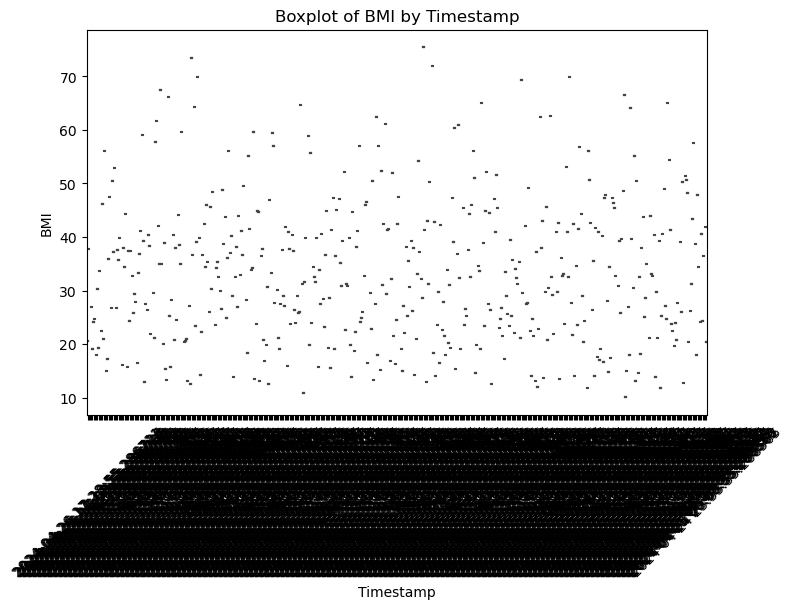

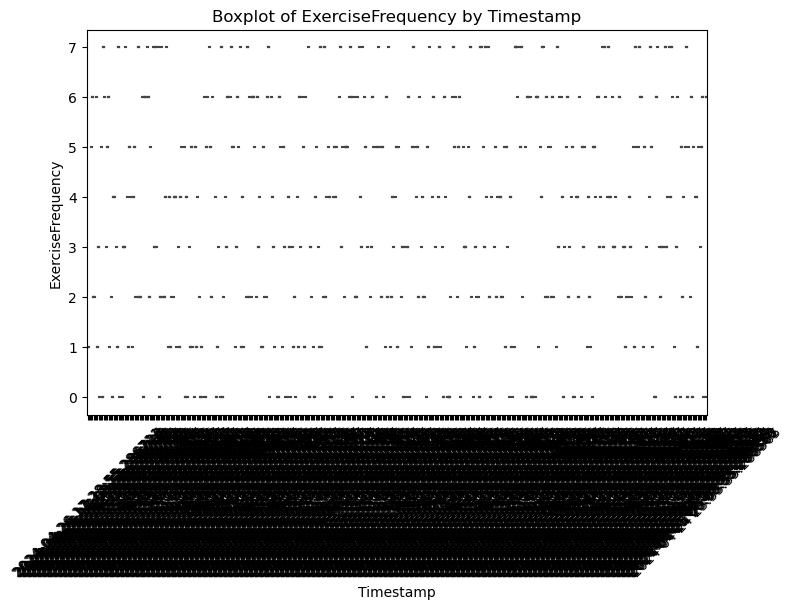

In [15]:
# Boxplots for categorical vs numerical features
for col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col], y=df[num_col])
        plt.title(f'Boxplot of {num_col} by {col}')
        plt.xticks(rotation=45)
        plt.show()

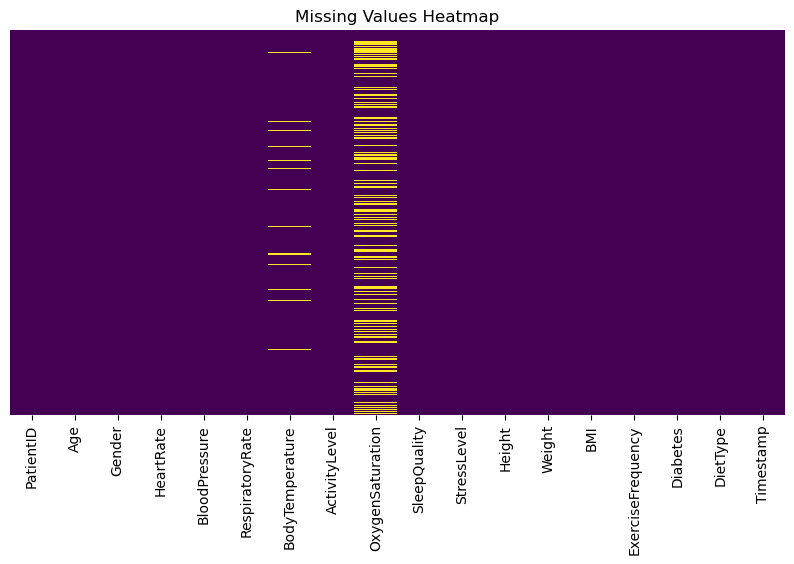

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("enhanced_healthmonitoring.csv") 

# For demonstration, let's create a synthetic dataset
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, 1000)  # Binary target variable (0 or 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results.append([name, f"{accuracy*100:.2f}%", f"{cross_val*100:.2f}%", f"{roc_auc*100:.2f}%"])

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["ML Algorithm", "Accuracy", "Cross Validation Score", "ROC AUC Score"])

# Add index column
results_df.insert(0, "Sr. No.", range(1, len(results_df) + 1))

# Display results
print(results_df)

   Sr. No.              ML Algorithm Accuracy Cross Validation Score  \
0        1       Logistic Regression   53.00%                 49.13%   
1        2    Support Vector Machine   55.50%                 47.62%   
2        3  Decision Tree Classifier   45.50%                 51.62%   
3        4  Random Forest Classifier   52.00%                 52.87%   
4        5       K-Nearest Neighbors   56.50%                 49.88%   

  ROC AUC Score  
0        54.16%  
1        44.38%  
2        45.50%  
3        52.36%  
4        57.74%  


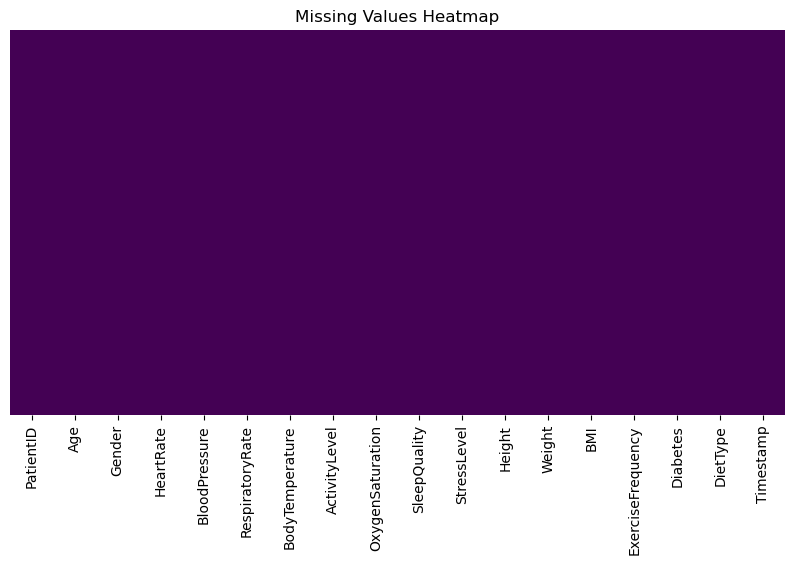

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("enhanced_healthmonitoring.csv")

# Handle missing values - Remove rows with missing data
df_cleaned = df.dropna()

# Plot missing values heatmap after handling
plt.figure(figsize=(10, 5))
sns.heatmap(df_cleaned.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Save cleaned dataset
df_cleaned.to_csv("cleaned_healthmonitoring.csv", index=False)